# CS:GO Competitive Matchmaking

Damage and grenade entries on over 410k rounds played in competitive Counter-Strike: Global Offensive.<br>
Source: https://www.kaggle.com/datasets/skihikingkevin/csgo-matchmaking-damage

### Table of contents
1. [Insights](#insights)
2. [Feature Summary](#features)
3. [Exploratory Analysis](#explore)
4. [Map Balance](#balance)
5. [Econ Similarities to Valorant](#econ)
6. [Does First Blood Matter?](#firstblood)

These csv files include data from over 16,400 ESEA matches, as well as around 1,400 ranked matches, from the game Counter-Strike: Global Offensive. All data was extracted from competitive matchmaking replays that were submitted to a site called csgo-stats. The author states that this data is meant for exploratory analysis.

The datasets provided include the following (where there are multiple files for some):
- **esea_master_dmg_demos:** each row is a damage entry in which one player (or world) has dealt damage to another
- **esea_master_grenades_demos:** each row is a grenade thrown entry in which one player has used a purchasable utility grenade
- **esea_master_kills_demos:** each row is a kill entry
- **esea_meta_demos:** each row is per round meta information (round winner, round time, etc) 
- **map_data:** in game map coordinates
- **mm_grenades_demos:** each row is a grenade thrown entry in which one player has used a purchasable utility grenade
- **mm_master_demos:** each row is a damage entry in which one player (or world) has dealt damage to another

Note: all files beginning with "esea" are from ESEA matches ranging from pugs to scrims that were scraped during a period of two weeks in August 2018. Here, the player ranks are unknown, but they are presumably highly ranked players or professionals.<br>
The files beginning with "mm" are from matchmaking matches (ranked) with average ranks between gold nova 1 and legendary eagle master.

Some **background info** on how the game works: it is a tactical shooter that involves two teams of 5. The games consist of at most 30 rounds with two 15 round halves. For the first half, one team starts as the "terrorists" in which they must take control of one of the enemy team's (the "counter terrorists") bomb sites and plant a bomb. To win, the bomb must either explode (not be defused by the "counter terrorists") or the "terrorists" must eliminate the entire enemy team. For the "counter terrorists" to win the round, they must either eliminate all the "terrorists" or defuse the planted bomb. After 15 rounds, the two teams swap sides. First team to win 16 rounds will win the entire game.

---

## Insights <a name="insights"></a>

CS:GO is one of the most popular tactical shooter games. I have personally never played it, instead I am more familiar with Valorant, which is also a tactical shooter but with added agent abilities (each character has special abilities only available to them, similar to games like Overwatch). Since Valorant's release, naturally, there has been much debate about which game is better. I had originally hoped to analyze Valorant data, however, either because Valorant is too new of a game (3 years old) or Riot is very stingy with their data, I could not find sufficient data. I hope to use this data to see how similar these games are while also extracting new insights on the advantages and disadvantages of certain actions mid game. I believe the latter types of insights can also be very helpful for Valorant gameplay, since at the end of the day these are both tactical shooters with the same objectives and win conditions.

In particular, one of the biggest arguments against Valorant is that CS:GO's maps are designed better. In Valorant, some maps are known to be heavily defense sided, making it very hard for the team that starts on the attack side to win. The data downloaded also included images of CS:GO's official radar maps, and just by taking a quick glance at some of the maps, I do believe that CS:GO's maps are more balanced (i.e. around 50% win rate from both sides).

Another insight that I hope to gain is how similar the economy is in CS:GO compared to Valorant. Economy is a huge aspect of Valorant (and I think CS:GO if it pans out similarly). At the start of each round, each team is designated a certain amount of money to spend on weapons and utility (smokes and grenades). The team that won the previous round is rewarded with more money to spend. Players that get kills are also given more money individually. Additionally, the players that did not die the previous round get to keep their weapons and unused utility. This added layer of complexity makes cooperation between teammates a necessity (at least in Valorant). It results in "save" rounds where teammates must agree to not buy weapons in hopes that they can buy full loadouts the next round. This is basically a forfeit of the current round (but sometimes still winnable!) to ensure that the struggling team will eventually have the same guns as the enemy team for an even fight (because if you keep losing rounds, eventually you cannot afford to keep buying the more powerful guns). I predict that, despite their differences in utility, there econ meta is the same in CS:GO as it is in Valorant.

The last insight I hope to gain is analyzing how first blood (the first kill of a round) affects the round outcome. I think the insights gained here will pertain to both games. My hypothesis is that first blood will affect the outcome, i.e. the team that got the first blood will be more likely to win the round. However, I think that this is only true for the attackers (the "terrorists") since the defenders (the "counter terrorists") have to control multiple sites. If the attackers get that first kill it will spread out the defenders making it easier to take a site. But if the defenders get the first kill, I predict that it won't matter as much since the attackers can still attack a site that may be only held by 2 or 3 players while they themselves have 4 players.

---

## Feature Summary <a name="features"></a>

Since there are 7 different types of datasets included in this data, we will describe each one separately, starting with `esea_master_dmg_demos`. The `esea` datasets are scrim data (matches between high level teams or pros) and therefore will offer us better insights on how the game should be played. The `mm` datasets are ranked game datasets and can, in some places, be less useful to us since the behavior in these games is unlikely to coincide with intended gameplay (i.e. lower level players do not know how to play the game correctly).

1. [esea master dmg demos](#damage)
2. [esea master grenades demos](#grenades)
3. [esea master kills demos](#kills)
4. [esea meta demos](#meta)
5. [map data](#map)
6. [mm grenades demos](#mmg)
7. [mm master demos](#master)

### 1. esea_master_dmg_demos <a name="damage"></a>

This data describes the damage dealt to players. Each row is a damage entry in which one player (or world) has dealt damage to another. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

pd.set_option('display.max_columns', None) # display all columns

In [2]:
dmg_df = spark.read.load('hdfs://orion08:24001/csgo/esea_master_dmg_demos.part*.csv',
                         format='csv',
                         sep=',',
                         inferSchema='true',
                         header='true')
dmg_df.count()

10538182

In [3]:
# extract the first 5 rows and schema from spark df
dmg_df_subset = dmg_df.head(5)
dmg_schema = dmg_df.schema

# convert the subset to a pandas df with schema (for pretty output)
pandas_dmg_df = pd.DataFrame(dmg_df_subset, columns=dmg_schema.fieldNames())
pandas_dmg_df

,file,round,tick,seconds,att_team,vic_team,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,bomb_site,hitbox,wp,wp_type,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y
0,esea_match_13770997.dem,1,14372,111.8476,World,Animal Style,None,CounterTerrorist,1,0,False,None,Generic,Unknown,Unkown,0,0,76561198055054795,0,0.0000,0.00000,0.0000,0.000000
1,esea_match_13770997.dem,1,15972,124.3761,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,18,9,False,None,Stomach,USP,Pistol,76561198048742997,0,76561198082200410,0,-1499.6900,63.33829,-669.5558,-79.769570
2,esea_match_13770997.dem,1,16058,125.0495,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,100,0,False,None,Head,USP,Pistol,76561198055054795,0,76561197961009213,0,-1066.8740,3.44563,-614.1868,-91.707770
3,esea_match_13770997.dem,1,16066,125.1121,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,12,7,False,None,RightArm,Glock,Pistol,76561198082200410,0,76561198055054795,0,-747.3146,-49.32681,-1065.5560,9.381622
4,esea_match_13770997.dem,1,16108,125.4410,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,15,7,False,None,Chest,USP,Pistol,76561198048742997,0,76561198082200410,0,-1501.8610,49.19798,-748.4188,-53.469220


<u>Feature Descriptions:</u>

**file:** the file name that the demo was scraped from, unique for each match<br>
**round:** the round that the damage took place<br>
**tick:** the current tick in the match (an update between the game's server and connected PCs), measured in hertz<br>
**seconds:** the number of seconds into the _match_ in which the damage occurred<br>
**att_team:** the team of the player that dealt damage to the victim (world included)<br>
**vic_team:** the team of the player that received damage<br>
**att_side:** the side that the attacker was on (Terrorist or CounterTerrorist)<br>
**vic_side:** the side that the victim was on (Terrorist or CounterTerrorist)<br>
**hp_dmg:** the total damage dealt in that duel to the victim, each player starts the round with 100 max hp<br>
**arm_dmg:** the total damage dealt to Kevlar (armor) <br>
**is_bomb_planted:** has the bomb been planted as of this entry<br>
**bomb_site:** the site the bomb is planted at (only A or B), empty if `is_bomb_planted` is false<br>
**hitbox:** the body area the victim was struck in<br>
**wp:** the weapon that the attacker used to deal damage<br>
**wp_type:** the type of weapon that the attacker used<br>
**att_id:** the steam id of the attacker, unique for each player<br>
**att_rank:** the new rank of the attacking player after the match is complete (unknown for all)<br>
**vic_id:** the steam id of the victim, unique for each player<br>
**vic_rank:** the new rank of the victim after the match is complete (unknown for all)<br>
**att_pos_x:** the X position of the attacker when they started the engagement<br>
**att_pos_y:** the Y position of the attacker when they started the engagement<br>
**vic_pos_x:** the X position of the victim when they received damage<br>
**vic_pos_y:** the Y position of the victim when they received damage

Note: all X and Y positions are in game coordinates and must be converted before being plotted on the radar maps, guide for conversion https://github.com/akiver/CSGO-Demos-Manager/blob/376cc90eb49425050b351bc933940480f6d48075/Services/Concrete/Maps/MapService.cs

### 2. esea_master_grenades_demos <a name="grenades"></a>

This data describes the player utility usage. Each row is a grenade thrown entry in which one player has used a purchasable utility grenade.

In [4]:
grenades_df = spark.read.load('hdfs://orion08:24001/csgo/esea_master_grenades_demos.part*.csv',
                              format='csv',
                              sep=',',
                              inferSchema='true',
                              header='true')
grenades_df.count()

5246458

In [5]:
# extract the first 5 rows and schema from spark df
grenades_df_subset = grenades_df.head(5)
grenades_schema = grenades_df.schema

# convert the subset to a pandas df with schema (for pretty output)
pandas_grenades_df = pd.DataFrame(grenades_df_subset, columns=grenades_schema.fieldNames())
pandas_grenades_df

,file,round,seconds,att_team,vic_team,att_id,vic_id,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,bomb_site,hitbox,nade,att_rank,vic_rank,att_pos_x,att_pos_y,nade_land_x,nade_land_y,vic_pos_x,vic_pos_y
0,esea_match_13770997.dem,1,153.1602,Animal Style,None,76561198165334141,NaN,CounterTerrorist,None,0,0,True,B,None,Smoke,0,NaN,-1618.146,-66.00259,-949.8569,-340.3019,NaN,NaN
1,esea_match_13770997.dem,2,184.7945,Hentai Hooligans,Animal Style,76561198037331400,7.656120e+16,Terrorist,CounterTerrorist,70,0,False,None,Generic,HE,0,0.0,-1719.904,-2357.64700,-2774.6650,-1603.9430,-2741.25,-1523.163
2,esea_match_13770997.dem,2,186.8617,Animal Style,None,76561198055191021,NaN,CounterTerrorist,None,0,0,False,None,None,HE,0,NaN,-1036.352,492.16760,-466.8676,-356.9641,NaN,NaN
3,esea_match_13770997.dem,2,187.1122,Animal Style,None,76561198055054795,NaN,CounterTerrorist,None,0,0,False,None,None,HE,0,NaN,-855.077,438.69090,-459.0147,-543.8581,NaN,NaN
4,esea_match_13770997.dem,2,191.0587,Hentai Hooligans,None,76561198037331400,NaN,Terrorist,None,0,0,False,None,None,Molotov,0,NaN,-2617.490,-1832.40700,-2743.5610,-927.2995,NaN,NaN


<u>Feature Descriptions:</u>

**file:** the file name that the demo was scraped from, unique for each match<br>
**round:** the round that the damage took place<br>
**seconds:** the number of seconds into the _match_ in which the event occurred<br>
**att_team:** the team of the player that dealt damage to the victim (world included)<br>
**vic_team:** the team of the player that received damage<br>
**att_id:** the steam id of the attacker, unique for each player<br>
**vic_id:** the steam id of the victim, unique for each player<br>
**att_side:** the side that the attacker was on (Terrorist or CounterTerrorist)<br>
**vic_side:** the side that the victim was on (Terrorist or CounterTerrorist)<br>
**hp_dmg:** the total damage dealt in that duel to the victim, each player starts the round with 100 max hp<br>
**arm_dmg:** the total damage dealt to Kevlar (armor) <br>
**is_bomb_planted:** has the bomb been planted as of this entry<br>
**bomb_site:** the site the bomb is planted at (only A or B), empty if `is_bomb_planted` is false<br>
**hitbox:** the body area the victim was struck in<br>
**nade:** type of utility used (Decoy, HE, Smoke, Flash, or Molotov)<br>
**att_rank:** the new rank of the attacking player after the match is complete (unknown for all)<br>
**vic_rank:** the new rank of the victim after the match is complete (unknown for all)<br>
**att_pos_x:** the X position of the attacker when they started the engagement<br>
**att_pos_y:** the Y position of the attacker when they started the engagement<br>
**nade_land_x:** the X position of the utility when it exploded or started<br>
**nade_land_y:** the Y position of the utility when it exploded or started<br>
**vic_pos_x:** the X position of the victim when they received damage<br>
**vic_pos_y:** the Y position of the victim when they received damage

Note: this dataset is referenced as grenades, but it's really any of the six utilities that are available for purchase.<br>
This includes decoys, high explosive grenades, smokes, flashbangs, incendiaries, molotovs.

### 3. esea_master_kills_demos <a name="kills"></a>

This data describes the players killed during a round. Each row is a kill entry.

In [6]:
kills_df = spark.read.load('hdfs://orion08:24001/csgo/esea_master_kills_demos.part*.csv',
                           format='csv',
                           sep=',',
                           inferSchema='true',
                           header='true')
kills_df.count()

2742646

In [7]:
# extract the first 5 rows and schema from spark df
kills_df_subset = kills_df.head(5)
kills_schema = kills_df.schema

# convert the subset to a pandas df with schema (for pretty output)
pandas_kills_df = pd.DataFrame(kills_df_subset, columns=kills_schema.fieldNames())
pandas_kills_df

,file,round,tick,seconds,att_team,vic_team,att_side,vic_side,wp,wp_type,ct_alive,t_alive,is_bomb_planted
0,esea_match_13770997.dem,1,16058,30.74165,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,USP,Pistol,5,4,False
1,esea_match_13770997.dem,1,16210,31.93185,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,4,4,False
2,esea_match_13770997.dem,1,16510,34.28094,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,3,4,False
3,esea_match_13770997.dem,1,17104,38.93212,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,USP,Pistol,3,3,False
4,esea_match_13770997.dem,1,17338,40.76441,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,2,3,False


<u>Feature Descriptions:</u>

**file:** the file name that the demo was scraped from, unique for each match<br>
**round:** the round that the damage took place<br>
**tick:** the converted tick to seconds within the game since match start<br>
**seconds:** the number of seconds into the _round_ in which the event occurred<br>
**att_team:** the team of the player that dealt damage to the victim (world included)<br>
**vic_team:** the team of the player that received damage<br>
**att_side:** the side that the attacker was on (Terrorist or CounterTerrorist)<br>
**vic_side:** the side that the victim was on (Terrorist or CounterTerrorist)<br>
**wp:** the weapon that the attacker used to deal damage<br>
**wp_type:** the type of weapon that the attacker used<br>
**ct_alive:** the number of counter terrorist players alive after this kill event<br>
**t_alive:** the number of terrorist players alive after this kill event<br>
**is_bomb_planted:** has the bomb been planted as of this entry

Note: seconds has a different meaning here than compared to the damage and grenades data.<br>
This data is missing location features, they must be inferred from the damage data.

### 4. esea_meta_demos <a name="meta"></a>

This data includes the per round meta information for each event from the damage, grenade, and kill datasets.

In [8]:
meta_df = spark.read.load('hdfs://orion08:24001/csgo/esea_meta_demos.part*.csv',
                          format='csv',
                          sep=',',
                          inferSchema='true',
                          header='true')
meta_df.count()

377629

In [9]:
# extract the first 5 rows and schema from spark df
meta_df_subset = meta_df.head(5)
meta_schema = meta_df.schema

# convert the subset to a pandas df with schema (for pretty output)
pandas_meta_df = pd.DataFrame(meta_df_subset, columns=meta_schema.fieldNames())
pandas_meta_df

,file,map,round,start_seconds,end_seconds,winner_team,winner_side,round_type,ct_eq_val,t_eq_val
0,esea_match_13770997.dem,de_overpass,1,94.30782,160.9591,Hentai Hooligans,Terrorist,PISTOL_ROUND,4300,4250
1,esea_match_13770997.dem,de_overpass,2,160.95910,279.3998,Hentai Hooligans,Terrorist,ECO,6300,19400
2,esea_match_13770997.dem,de_overpass,3,279.39980,341.0084,Hentai Hooligans,Terrorist,SEMI_ECO,7650,19250
3,esea_match_13770997.dem,de_overpass,4,341.00840,435.4259,Hentai Hooligans,Terrorist,NORMAL,24900,23400
4,esea_match_13770997.dem,de_overpass,5,435.42590,484.2398,Animal Style,CounterTerrorist,ECO,5400,20550


<u>Feature Descriptions:</u>

**file:** the file name that the demo was scraped from, unique for each match<br>
**map:** the unique map name<br>
**round:** the round number<br>
**start_seconds:** the second into the demo that the round started (includes freeze time)<br>
**end_seconds:** the second into the demo that the round ended (official end)<br>
**winner_team:** the team that won at the end of that round<br>
**winner_side:** the side that the `winner_team` was on<br>
**round_type:** the estimated round type by Akiver's csgo demo manager (imperfect)<br>
**ct_eq_val:** the counter terrorist team's total equipment value (weapon + grenades + armor + utilities) after buy time<br>
**t_eq_val:** the terrorist team's total equipment value (weapon + grenades + armor + utilities) after buy time

### 5. map_data <a name="map"></a>

This data includes the coordinates of each map. The X and Y coordinates are all in-game coordinates and need to be linearly scaled to be plotted on any official radar maps.

In [10]:
map_df = spark.read.load('hdfs://orion08:24001/csgo/map_data.csv',
                          format='csv',
                          sep=',',
                          inferSchema='true',
                          header='true')
map_df.count()

7

In [11]:
# convert spark df to pandas df (small enough)
pandas_map_df = map_df.toPandas()
pandas_map_df

,_c0,EndX,EndY,ResX,ResY,StartX,StartY
0,de_cache,3752,3187,1024,1024,-2031,-2240
1,de_cbble,2282,3032,1024,1024,-3819,-3073
2,de_dust2,2127,3455,1024,1024,-2486,-1150
3,de_inferno,2797,3800,1024,1024,-1960,-1062
4,de_mirage,1912,1682,1024,1024,-3217,-3401
5,de_overpass,503,1740,1024,1024,-4820,-3591
6,de_train,2262,2447,1024,1024,-2436,-2469


<u>Feature Descriptions:</u>

**\_c0:** the unique map name<br>
**EndX:** the X position of the radar map's end<br>
**EndY:** the Y position of the radar map's end<br>
**ResX:** the X resolution of the radar map<br>
**ResY:** the Y resolution of the radar map<br>
**StartX:** the X position of the radar map's start<br>
**StartY:** the Y position of start<br>

Note: this dataset only includes data for the maps in the active duty map pool, which are the maps currently in competitive play.

### 6. mm_grenades_demos <a name="mmg"></a>

This data describes the player utility usage. Each row is a grenade thrown entry in which one player has used a purchasable utility grenade. Unlike the esea data, it also includes the round metadata as additional columns here.

In [12]:
mmg_df = spark.read.load('hdfs://orion08:24001/csgo/mm_grenades_demos.csv',
                         format='csv',
                         sep=',',
                         inferSchema='true',
                         header='true')
mmg_df.count()

366098

In [13]:
# extract the first 5 rows and schema from spark df
mmg_df_subset = mmg_df.head(5)
mmg_schema = mmg_df.schema

# convert the subset to a pandas df with schema (for pretty output)
pandas_mmg_df = pd.DataFrame(mmg_df_subset, columns=mmg_schema.fieldNames())
pandas_mmg_df

23/05/22 08:54:36 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,_c0,file,map,round,start_seconds,seconds,end_seconds,att_team,vic_team,att_id,vic_id,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,bomb_site,hitbox,nade,winner_team,winner_side,att_rank,vic_rank,att_pos_x,att_pos_y,nade_land_x,nade_land_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
0,0,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,125.1816,197.6025,Team 2,None,76561198244806730,NaN,Terrorist,None,0,0,False,None,None,Decoy,Team 1,CounterTerrorist,13,NaN,-918.1018,-856.1255,257.32770,-435.8516,NaN,NaN,PISTOL_ROUND,2950,3850,16.0
1,1,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,139.1844,197.6025,Team 2,None,76561198051040004,NaN,Terrorist,None,0,0,False,None,None,Decoy,Team 1,CounterTerrorist,17,NaN,-1310.6070,1145.8650,-1124.67500,1216.9330,NaN,NaN,PISTOL_ROUND,2950,3850,16.0
2,2,003201673717864202280_0171883906.dem,de_dust2,1,109.5534,166.0649,197.6025,Team 2,Team 2,76561198147933469,7.656120e+16,Terrorist,Terrorist,36,0,False,None,Generic,HE,Team 1,CounterTerrorist,18,18.0,-180.6393,327.6691,-89.53781,318.2151,-130.1585,304.0313,PISTOL_ROUND,2950,3850,16.0
3,3,003201673717864202280_0171883906.dem,de_dust2,2,197.6025,213.0431,281.2757,Team 1,None,76561198051106390,NaN,CounterTerrorist,None,0,0,False,None,None,Smoke,Team 2,Terrorist,16,NaN,151.3117,2304.8010,-431.48370,2126.3900,NaN,NaN,ECO,12400,4700,16.0
4,4,003201673717864202280_0171883906.dem,de_dust2,2,197.6025,220.8572,281.2757,Team 1,None,76561198051106390,NaN,CounterTerrorist,None,0,0,False,None,None,HE,Team 2,Terrorist,16,NaN,-1669.9540,2197.1340,-1955.98500,1384.2130,NaN,NaN,ECO,12400,4700,16.0


Almost all features in the mm_grenades_demo dataset have been described before.<br>
We will show an overview of the schema and describe only the fields which we have not seen yet.

In [14]:
mmg_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- file: string (nullable = true)
 |-- map: string (nullable = true)
 |-- round: integer (nullable = true)
 |-- start_seconds: double (nullable = true)
 |-- seconds: double (nullable = true)
 |-- end_seconds: double (nullable = true)
 |-- att_team: string (nullable = true)
 |-- vic_team: string (nullable = true)
 |-- att_id: long (nullable = true)
 |-- vic_id: double (nullable = true)
 |-- att_side: string (nullable = true)
 |-- vic_side: string (nullable = true)
 |-- hp_dmg: integer (nullable = true)
 |-- arm_dmg: integer (nullable = true)
 |-- is_bomb_planted: boolean (nullable = true)
 |-- bomb_site: string (nullable = true)
 |-- hitbox: string (nullable = true)
 |-- nade: string (nullable = true)
 |-- winner_team: string (nullable = true)
 |-- winner_side: string (nullable = true)
 |-- att_rank: integer (nullable = true)
 |-- vic_rank: double (nullable = true)
 |-- att_pos_x: double (nullable = true)
 |-- att_pos_y: double (nullable = true

<u>Feature Descriptions:</u>

**\_c0:** the unique record id<br>
**att_rank:** the new rank of the attacking player after the match is complete<br>
**vic_rank:** the new rank of the victim after the match is complete<br>
**avg_match_rank:** the average rank over all players in the match

### 7. mm_master_demos <a name="master"></a>

This data describes the damage dealt to players. Each row is a damage entry in which one player (or world) has dealt damage to another. Unlike the esea data, it also includes the round metadata as additional columns here.

In [15]:
mm_df = spark.read.load('hdfs://orion08:24001/csgo/mm_master_demos.csv',
                        format='csv',
                        sep=',',
                        inferSchema='true',
                        header='true')
mm_df.count()

955466

In [16]:
# extract the first 5 rows and schema from spark df
mm_df_subset = mm_df.head(5)
mm_schema = mm_df.schema

# convert the subset to a pandas df with schema (for pretty output)
pandas_mm_df = pd.DataFrame(mm_df_subset, columns=mm_schema.fieldNames())
pandas_mm_df

,_c0,file,map,date,round,tick,seconds,att_team,vic_team,att_side,vic_side,hp_dmg,arm_dmg,is_bomb_planted,bomb_site,hitbox,wp,wp_type,award,winner_team,winner_side,att_id,att_rank,vic_id,vic_rank,att_pos_x,att_pos_y,vic_pos_x,vic_pos_y,round_type,ct_eq_val,t_eq_val,avg_match_rank
0,0,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8482,133.0582,Team 1,Team 2,CounterTerrorist,Terrorist,100,0,False,None,Head,USP,Pistol,300,Team 1,CounterTerrorist,76561198085893650,17,76561198123082770,17,1473.847,1351.358,662.170,772.748,PISTOL_ROUND,2950,3850,16.0
1,1,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8600,134.9023,Team 1,Team 2,CounterTerrorist,Terrorist,25,0,False,None,RightLeg,USP,Pistol,300,Team 1,CounterTerrorist,76561198223006752,16,76561198051040004,17,-1211.723,1060.813,-1184.006,1153.343,PISTOL_ROUND,2950,3850,16.0
2,2,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8610,135.0586,Team 2,Team 1,Terrorist,CounterTerrorist,20,0,False,None,LeftLeg,Glock,Pistol,300,Team 1,CounterTerrorist,76561198051040004,17,76561198223006752,16,-1153.584,1163.131,-1198.015,1050.423,PISTOL_ROUND,2950,3850,16.0
3,3,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8624,135.2774,Team 1,Team 2,CounterTerrorist,Terrorist,17,8,False,None,Chest,USP,Pistol,300,Team 1,CounterTerrorist,76561198223006752,16,76561198051040004,17,-1173.053,1044.365,-1141.785,1190.089,PISTOL_ROUND,2950,3850,16.0
4,4,003201673717864202280_0171883906.dem,de_dust2,09/28/2017 8:44:22 PM,1,8632,135.4024,Team 2,Team 1,Terrorist,CounterTerrorist,12,7,False,None,Chest,Glock,Pistol,300,Team 1,CounterTerrorist,76561198051040004,17,76561198223006752,16,-1142.522,1200.967,-1157.690,1050.702,PISTOL_ROUND,2950,3850,16.0


Again, almost all features in the mm_master_demo dataset have been described before.<br>
We will show an overview of the schema and describe only the fields which we have not seen yet.

In [17]:
mm_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- file: string (nullable = true)
 |-- map: string (nullable = true)
 |-- date: string (nullable = true)
 |-- round: integer (nullable = true)
 |-- tick: integer (nullable = true)
 |-- seconds: double (nullable = true)
 |-- att_team: string (nullable = true)
 |-- vic_team: string (nullable = true)
 |-- att_side: string (nullable = true)
 |-- vic_side: string (nullable = true)
 |-- hp_dmg: integer (nullable = true)
 |-- arm_dmg: integer (nullable = true)
 |-- is_bomb_planted: boolean (nullable = true)
 |-- bomb_site: string (nullable = true)
 |-- hitbox: string (nullable = true)
 |-- wp: string (nullable = true)
 |-- wp_type: string (nullable = true)
 |-- award: integer (nullable = true)
 |-- winner_team: string (nullable = true)
 |-- winner_side: string (nullable = true)
 |-- att_id: long (nullable = true)
 |-- att_rank: integer (nullable = true)
 |-- vic_id: long (nullable = true)
 |-- vic_rank: integer (nullable = true)
 |-- att_pos_x: doubl

<u>Feature Descriptions:</u>

**\_c0:** the unique record id<br>
**date:** date the match was played<br>
**award:** the kill reward (in dollars) that the player get should they kill that person<br>
**att_rank:** the new rank of the attacking player after the match is complete<br>
**vic_rank:** the new rank of the victim after the match is complete<br>
**avg_match_rank:** the average rank over all players in the match

---

## Exploratory Analysis <a name="explore"></a>

The data is pretty straightforward and doesn't require any necessary cleaning. If we were to plot out the events, we would need to transform the X and Y coordinates, but for now, the data can remain as is. The following cells check out the summary statistics for some of the more important features.

In [18]:
# register dmg_df as temporary table
dmg_df.createOrReplaceTempView("dmg_table")

# check out the different weapon types that caused damage
weapons = spark.sql("SELECT DISTINCT wp FROM dmg_table")
weapons.show(70, truncate=False)

+------------+
|wp          |
+------------+
|P250        |
|XM1014      |
|Mac10       |
|G3SG1       |
|Famas       |
|DualBarettas|
|CZ          |
|Scar20      |
|SG556       |
|Molotov     |
|Unknown     |
|M4A1        |
|P90         |
|Nova        |
|M249        |
|Smoke       |
|Glock       |
|AUG         |
|Scout       |
|AWP         |
|Swag7       |
|Tec9        |
|AK47        |
|Deagle      |
|Flash       |
|UMP         |
|SawedOff    |
|Gallil      |
|MP9         |
|Negev       |
|P2000       |
|FiveSeven   |
|Zeus        |
|MP7         |
|Incendiary  |
|Knife       |
|USP         |
|Bizon       |
|HE          |
|M4A4        |
|Bomb        |
|Decoy       |
+------------+



It's interesting that smoke is in here. Let's take a look at what kind of damage happens with smoke. In valorant typical smokes do not cause damage (unless it's a poison orb) but since CS:GO doesn't have these special abilities I wonder how smoke ended up in the damage data.

In [19]:
# check out the smoke damage events
smoke_dmg = spark.sql("SELECT file, round, hp_dmg, arm_dmg, hitbox, wp, wp_type FROM dmg_table WHERE wp = 'Smoke' LIMIT 20")
smoke_dmg.show(truncate=False)

+-----------------------+-----+------+-------+-------+-----+-------+
|file                   |round|hp_dmg|arm_dmg|hitbox |wp   |wp_type|
+-----------------------+-----+------+-------+-------+-----+-------+
|esea_match_13786743.dem|6    |1     |0      |Generic|Smoke|Grenade|
|esea_match_13786743.dem|6    |1     |0      |Generic|Smoke|Grenade|
|esea_match_13786752.dem|5    |1     |0      |Generic|Smoke|Grenade|
|esea_match_13786752.dem|14   |1     |0      |Generic|Smoke|Grenade|
|esea_match_13786752.dem|14   |1     |0      |Generic|Smoke|Grenade|
|esea_match_13786755.dem|9    |1     |0      |Generic|Smoke|Grenade|
|esea_match_13786768.dem|18   |1     |0      |Generic|Smoke|Grenade|
|esea_match_13786768.dem|18   |1     |0      |Generic|Smoke|Grenade|
|esea_match_13786769.dem|19   |1     |0      |Generic|Smoke|Grenade|
|esea_match_13786769.dem|19   |1     |0      |Generic|Smoke|Grenade|
|esea_match_13786772.dem|14   |1     |0      |Generic|Smoke|Grenade|
|esea_match_13786772.dem|14   |1  

In [20]:
# check out the max damage possible from smokes
max_smoke_dmg = spark.sql("SELECT MAX(hp_dmg) FROM dmg_table WHERE wp = 'Smoke'")
max_smoke_dmg.show()

+-----------+
|max(hp_dmg)|
+-----------+
|          4|
+-----------+



This is actually really funny. If a player has low health, they can essentially be killed if a smoke is thrown at them. Even in valorant this can't happen (the poison orbs can only drop you to 1 hp while you stay inside them).

In [21]:
# check out the different weapon types
weapon_types = spark.sql("SELECT DISTINCT wp_type FROM dmg_table")
weapon_types.show(truncate=False)

+---------+
|wp_type  |
+---------+
|Grenade  |
|Equipment|
|Sniper   |
|Rifle    |
|Heavy    |
|Unkown   |
|Pistol   |
|SMG      |
+---------+



In [22]:
# check out hp damage stats
dmg_df.select("hp_dmg").describe().show()

+-------+------------------+
|summary|            hp_dmg|
+-------+------------------+
|  count|          10538182|
|   mean| 28.70006031400862|
| stddev|24.785718805337172|
|    min|                 1|
|    max|               100|
+-------+------------------+



In [23]:
# check out armor damage stats
dmg_df.select("arm_dmg").describe().show()

+-------+------------------+
|summary|           arm_dmg|
+-------+------------------+
|  count|          10538182|
|   mean|  3.71434721852403|
| stddev|4.9539481384176245|
|    min|                 0|
|    max|               100|
+-------+------------------+



From the above summaries, it looks like for every damage event, hp damage is always dealt. However, there are cases where armor takes no damage. I suspect this is actually when the player did not buy any armor, though.

In [24]:
# check out bomb planted values
bomb_planted = spark.sql("SELECT DISTINCT is_bomb_planted FROM dmg_table")
bomb_planted.show()

+---------------+
|is_bomb_planted|
+---------------+
|           true|
|          false|
+---------------+



In [25]:
# check out bomb site values
bomb_sites = spark.sql("SELECT DISTINCT bomb_site FROM dmg_table")
bomb_sites.show()

+---------+
|bomb_site|
+---------+
|     null|
|        B|
|        A|
+---------+



Null makes sense here for when the bomb does not get planted.

In [26]:
# check out the different hitbox spots
hitbox = spark.sql("SELECT DISTINCT hitbox FROM dmg_table")
hitbox.show()

+--------+
|  hitbox|
+--------+
|       8|
|    Head|
| LeftArm|
| Stomach|
|RightArm|
| LeftLeg|
|RightLeg|
|   Chest|
| Generic|
+--------+



This is more in depth than valorant's hitbox stats, which only record if damage is done to the head, body, or legs. The 8 is a little weird, I wonder if that's bad data.

In [27]:
# checkout wierd 8 hitbox
hitbox = spark.sql("SELECT file, round, hp_dmg, arm_dmg, hitbox, wp, wp_type FROM dmg_table WHERE hitbox = 8 LIMIT 20")
hitbox.show(truncate=False)

+-----------------------+-----+------+-------+------+------+-------+
|file                   |round|hp_dmg|arm_dmg|hitbox|wp    |wp_type|
+-----------------------+-----+------+-------+------+------+-------+
|esea_match_13789015.dem|1    |9     |5      |8     |Glock |Pistol |
|esea_match_13789017.dem|7    |27    |4      |8     |AK47  |Rifle  |
|esea_match_13789017.dem|17   |12    |3      |8     |MP7   |SMG    |
|esea_match_13789018.dem|14   |27    |3      |8     |AK47  |Rifle  |
|esea_match_13789020.dem|18   |15    |3      |8     |P90   |SMG    |
|esea_match_13789023.dem|12   |20    |4      |8     |AK47  |Rifle  |
|esea_match_13789023.dem|15   |3     |1      |8     |P2000 |Pistol |
|esea_match_13789025.dem|5    |39    |1      |8     |Deagle|Pistol |
|esea_match_13789027.dem|7    |26    |3      |8     |AK47  |Rifle  |
|esea_match_13789027.dem|9    |26    |3      |8     |AK47  |Rifle  |
|esea_match_13789027.dem|21   |26    |3      |8     |AK47  |Rifle  |
|esea_match_13789030.dem|2    |19 

The data varies greatly here, and the 8 doesn't even seem to be an id for another hitbox.

In [28]:
# register grenades_df as temporary table
grenades_df.createOrReplaceTempView("grenades_table")

# check out the different grenade utility
nades = spark.sql("SELECT DISTINCT nade FROM grenades_table")
nades.show()

+----------+
|      nade|
+----------+
|   Molotov|
|     Decoy|
|     Smoke|
|     Flash|
|Incendiary|
|        HE|
+----------+



The utility is as expected.

In [29]:
# register kills_df as temporary table
kills_df.createOrReplaceTempView("kills_table")

# check out the different number of counter terrorists alive at each kill event
ct_alive = spark.sql("SELECT DISTINCT ct_alive FROM kills_table ORDER BY ct_alive")
ct_alive.show()

+--------+
|ct_alive|
+--------+
|      -5|
|      -4|
|      -3|
|      -2|
|      -1|
|       0|
|       1|
|       2|
|       3|
|       4|
|       5|
+--------+



Now this is super interesting because how can there be negative players alive? Let's check out these negative rounds.

In [30]:
# find the rows wth neg ct players alive
neg_ct_alive = spark.sql("SELECT file, round, att_team, vic_team, wp, ct_alive, t_alive, is_bomb_planted FROM kills_table\
                            WHERE ct_alive < 0 LIMIT 20")

neg_ct_alive.show(truncate=False)

+-----------------------+-----+--------+--------+------+--------+-------+---------------+
|file                   |round|att_team|vic_team|wp    |ct_alive|t_alive|is_bomb_planted|
+-----------------------+-----+--------+--------+------+--------+-------+---------------+
|esea_match_13782060.dem|13   |Team 2  |Team 1  |AK47  |-1      |-3     |true           |
|esea_match_13782090.dem|10   |Team 2  |Team 1  |AK47  |-1      |1      |true           |
|esea_match_13782090.dem|10   |Team 2  |Team 1  |AK47  |-2      |1      |true           |
|esea_match_13782090.dem|10   |Team 2  |Team 1  |AK47  |-3      |1      |true           |
|esea_match_13782090.dem|10   |Team 1  |Team 2  |USP   |-3      |0      |true           |
|esea_match_13782090.dem|10   |Team 2  |Team 1  |AK47  |-4      |0      |true           |
|esea_match_13782090.dem|10   |Team 2  |Team 1  |AK47  |-5      |0      |true           |
|esea_match_13783434.dem|12   |Team 2  |Team 1  |AK47  |-1      |1      |false          |
|esea_matc

In [31]:
# check out a negative round
neg_round = spark.sql("SELECT round, seconds, att_side, vic_side, wp, ct_alive, t_alive, is_bomb_planted FROM kills_table\
                        WHERE file = 'esea_match_13782235.dem' AND round = 21")

neg_round.show()

+-----+-----------------+----------------+----------------+------+--------+-------+---------------+
|round|          seconds|        att_side|        vic_side|    wp|ct_alive|t_alive|is_bomb_planted|
+-----+-----------------+----------------+----------------+------+--------+-------+---------------+
|   21|         25.16895|CounterTerrorist|       Terrorist|Deagle|       5|      4|          false|
|   21|         25.18457|       Terrorist|CounterTerrorist|  AK47|       4|      4|          false|
|   21|         34.36255|       Terrorist|CounterTerrorist|  AK47|       3|      4|          false|
|   21|         36.39868|       Terrorist|CounterTerrorist|  AK47|       2|      4|          false|
|   21|         47.40906|       Terrorist|CounterTerrorist|  AK47|       1|      4|          false|
|   21|         48.09827|CounterTerrorist|       Terrorist|Deagle|       1|      3|          false|
|   21|         48.63074|       Terrorist|CounterTerrorist|  AK47|       0|      3|          false|


This is extremely odd and I can't think of a reason in which this could be correct. You cannot revive a dead teammate, so I'm not sure how a counter terrorist can pick up a P250 and kill a Terrorist if there weren't any counter terrorists alive in the first place. The rounds aren't overlapping like I initially thought either.

In [32]:
# cross reference with damage data
neg_dmg = spark.sql("SELECT seconds, att_id, vic_side, vic_id, hp_dmg, arm_dmg, wp, hitbox FROM dmg_table\
                        WHERE file = 'esea_match_13782235.dem' AND round = 21")

neg_dmg.show(50)

+------------------+-----------------+----------------+-----------------+------+-------+------+--------+
|           seconds|           att_id|        vic_side|           vic_id|hp_dmg|arm_dmg|    wp|  hitbox|
+------------------+-----------------+----------------+-----------------+------+-------+------+--------+
|          1831.694|76561198002029991|       Terrorist|76561198215167165|   100|      5|Deagle|    Head|
|           1831.71|76561198206863843|CounterTerrorist|76561198002029991|   100|     15|  AK47|    Head|
|           1840.59|76561198180665254|CounterTerrorist|76561197971471048|    26|      3|  AK47| LeftArm|
|            1840.7|76561198180665254|CounterTerrorist|76561197971471048|    26|      3|  AK47|   Chest|
|1840.7939999999999|76561198180665254|CounterTerrorist|76561197971471048|    26|      3|  AK47|   Chest|
|          1840.888|76561198180665254|CounterTerrorist|76561197971471048|    22|      3|  AK47|   Chest|
|          1842.626|76561198180665254|CounterTerrorist|

In [33]:
# cross reference with damage data
neg_dmg = spark.sql("SELECT vic_id, MAX(vic_team), MAX(vic_side) FROM dmg_table\
                        WHERE file = 'esea_match_13782235.dem' AND round = 21 GROUP BY vic_id")

neg_dmg.show()

+-----------------+-------------+----------------+
|           vic_id|max(vic_team)|   max(vic_side)|
+-----------------+-------------+----------------+
|76561197971471048|       Team 2|CounterTerrorist|
|76561198002029991|       Team 2|CounterTerrorist|
|76561198180665254|       Team 1|       Terrorist|
|76561198193298595|       Team 1|       Terrorist|
|76561198194992829|       Team 2|CounterTerrorist|
|76561198206863843|       Team 1|       Terrorist|
|76561198215167165|       Team 1|       Terrorist|
|76561198256213312|       Team 2|CounterTerrorist|
|76561198335967313|       Team 2|CounterTerrorist|
+-----------------+-------------+----------------+



In [34]:
# look at specific victim
neg_dmg = spark.sql("""SELECT seconds, att_id, vic_side, vic_id, hp_dmg, arm_dmg, wp, hitbox
                        FROM dmg_table
                        WHERE file = 'esea_match_13782235.dem'
                            AND round = 21
                            AND vic_id = 76561198256213312""")

neg_dmg.show()

+------------------+-----------------+----------------+-----------------+------+-------+----+--------+
|           seconds|           att_id|        vic_side|           vic_id|hp_dmg|arm_dmg|  wp|  hitbox|
+------------------+-----------------+----------------+-----------------+------+-------+----+--------+
|          1842.626|76561198180665254|CounterTerrorist|76561198256213312|    35|      0|AK47|RightArm|
|           1842.83|76561198180665254|CounterTerrorist|76561198256213312|    26|      0|AK47| LeftLeg|
|          1842.924|76561198180665254|CounterTerrorist|76561198256213312|    39|      0|AK47| Stomach|
|1899.9489999999998|76561198193298595|CounterTerrorist|76561198256213312|    44|      0|AK47| Stomach|
|          1900.043|76561198193298595|CounterTerrorist|76561198256213312|    44|      0|AK47| Stomach|
|1901.3429999999998|76561198206863843|CounterTerrorist|76561198256213312|    12|      0|AK47| Stomach|
+------------------+-----------------+----------------+-----------------+

After looking at the above specific round, cross referencing with the damage table, and looking into a specific player, it doesn't look like the kill table is necessarily wrong. Player `76561198256213312` dies at around 1842 seconds into the match. The damage tables confirm that they took 100 hp dmg, so they would be dead. However, around 57 seconds later, they take an additional 100 damage. Each round is 1:55 seconds, so the timing tracks. However, looking at these two rows from the kills table (4 tables above), the timing seems a bit odd:

```
|   21|         48.63074|       Terrorist|CounterTerrorist|  AK47|       0|      3|          false|
|   21|         80.11145|       Terrorist|CounterTerrorist|  AK47|      -1|      3|          false|
```

There is quite the gap in time from when I would think the round is over. But, I think this is actually intended. This is scrim data where the ranks are unknown, so this must be custom data. Meaning that the players are able to restart rounds (this helps players practice rounds that maybe went wrong).

See: https://liquidsky.com/how-to-restart-a-round-in-csgo/

To confirm, we will look at the competitive matchmaking data where players are unable to replay rounds. It's still better to analyze scrim data over ranked gameplay since there are so many variables that can affect ranked gameplay (and the players just aren't that good), but we will look at this data to confirm our suspicions.

In [35]:
# register mm_df as temporary table
mm_df.createOrReplaceTempView("mm_table")

# find file, round, and id of player who gets more than 100 damage
target = spark.sql("""SELECT DISTINCT file, round, vic_id FROM mm_table
                        GROUP BY file, round, vic_id
                        HAVING SUM(hp_dmg) > 100
                        LIMIT 5""")

target.show(truncate=False)

+------------------------------------+-----+-----------------+
|file                                |round|vic_id           |
+------------------------------------+-----+-----------------+
|003229522637998784550_0985923831.dem|21   |76561198192357477|
|003229369885339418667_1040089946.dem|12   |76561198207696592|
|003229529836363972856_1413899635.dem|2    |76561198273862765|
|003229680473751945602_1824793669.dem|12   |76561198295359895|
|003229359528025784321_1289340245.dem|18   |76561198270156886|
+------------------------------------+-----+-----------------+



In [36]:
# check out round with player id: 76561198209161271
target_round_1 = spark.sql("""SELECT seconds, att_id, vic_side, vic_id, hp_dmg, arm_dmg, wp, hitbox
                                FROM mm_table
                                WHERE file = '003231572978076483711_1980968073.dem' AND round = 21""")

target_round_1.show(truncate=False)

+------------------+-----------------+----------------+-----------------+------+-------+------+--------+
|seconds           |att_id           |vic_side        |vic_id           |hp_dmg|arm_dmg|wp    |hitbox  |
+------------------+-----------------+----------------+-----------------+------+-------+------+--------+
|1989.395          |76561198259300986|Terrorist       |76561198155211016|17    |4      |P90   |Stomach |
|1989.4260000000002|76561198155211016|CounterTerrorist|76561198259300986|27    |3      |AK47  |Chest   |
|1989.457          |76561198259300986|Terrorist       |76561198155211016|18    |4      |P90   |Stomach |
|1989.52           |76561198155211016|CounterTerrorist|76561198259300986|27    |3      |AK47  |RightArm|
|1989.52           |76561198259300986|Terrorist       |76561198155211016|18    |4      |P90   |Stomach |
|1989.614          |76561198155211016|CounterTerrorist|76561198259300986|33    |4      |AK47  |Stomach |
|1989.9579999999999|76561198259300986|Terrorist       |

In [37]:
# check out round with player id: 76561198012477515
target_round_2 = spark.sql("""SELECT seconds, att_id, vic_side, vic_id, hp_dmg, arm_dmg, wp, hitbox
                                FROM mm_table
                                WHERE file = '003231561055247270086_0969652256.dem' AND round = 22""")

target_round_2.show(truncate=False)

+------------------+-----------------+----------------+-----------------+------+-------+------+--------+
|seconds           |att_id           |vic_side        |vic_id           |hp_dmg|arm_dmg|wp    |hitbox  |
+------------------+-----------------+----------------+-----------------+------+-------+------+--------+
|1993.1070000000002|76561198263640994|Terrorist       |76561198280017966|63    |0      |HE    |Generic |
|1993.1070000000002|76561198263640994|Terrorist       |76561198057443505|9     |0      |HE    |Generic |
|1995.795          |76561198263640994|Terrorist       |76561198057443505|16    |0      |XM1014|Stomach |
|1996.139          |76561198263640994|Terrorist       |76561198057443505|55    |0      |XM1014|Head    |
|1996.139          |76561198263640994|Terrorist       |76561198057443505|17    |0      |XM1014|Stomach |
|1996.139          |76561198263640994|Terrorist       |76561198057443505|13    |0      |XM1014|Chest   |
|2002.359          |76561198263640994|Terrorist       |

The players seem to stay dead here, so that's good. Before we move on to the 3 questions, we first want to check that the round meta data doesn't double count these replayed rounds.

In [38]:
# register meta_df as temporary table
meta_df.createOrReplaceTempView("meta_table")

# check out the different round data
dup_rounds = spark.sql("""SELECT COUNT(*)
                            FROM meta_table
                            GROUP BY file, map, round
                            HAVING COUNT(*) > 1""")

dup_rounds.show()

+--------+
|count(1)|
+--------+
+--------+



There is no duplicate round data, so that is great news! This means that even if the round was replayed during a scrim, we still only get the data once, meaning that we only count the winner of the replayed round as the winner of the overall round (even if they might have lost all players before the replay). We must keep this in mind when analyzing how different events (such as kills) may affect round outcomes. We now move on to the 3 questions.

---

## Map Balance <a name="balance"></a>

Fans of CS:GO claim that their maps are superior to valorant's map in that they are more fair and balanced. This means that attackers and defenders have about the same winrate on both sides of the map (terrorists and counter terrorists). Valorant maps are known to be heavily defense favored, the most famously defense sided map (before its rework) was called Split. It was so defense sided that as an attacker, if you were able to get at least 2 or 3 round wins in the first half, you would most likely win the whole game. Let's see if this is the case for any of CS:GO's maps and if they do indeed have the better map designs.

We will begin by first looking at the attack win rates across all the data for each map, and then take a look at the defense win rates. We will use the metadata table since we are interested in round level data. This should show us if any map is more attack or defense sided.

In [39]:
# get the attack and defense sided percentages in scrim play
esea_map_rates = spark.sql(
    """SELECT
        map,
        ROUND(SUM(IF(winner_side = 'Terrorist', 1, 0)) / COUNT(round), 3) AS terrorist_winrate,
        ROUND(SUM(IF(winner_side = 'CounterTerrorist', 1, 0)) / COUNT(round), 3) AS counter_terrorist_winrate,
        ROUND(ABS(SUM(IF(winner_side = 'Terrorist', 1, 0)) / COUNT(round) - SUM(IF(winner_side = 'CounterTerrorist', 1, 0)) / COUNT(round)), 3) AS rate_diff
    FROM
        meta_table
    GROUP BY
        map
    ORDER BY
        rate_diff DESC""")

esea_map_rates.show()

+-----------+-----------------+-------------------------+---------+
|        map|terrorist_winrate|counter_terrorist_winrate|rate_diff|
+-----------+-----------------+-------------------------+---------+
|    de_nuke|            0.444|                    0.556|    0.113|
|   de_dust2|            0.538|                    0.462|    0.077|
|   de_train|            0.468|                    0.532|    0.065|
| de_inferno|            0.527|                    0.473|    0.053|
|   de_cbble|            0.526|                    0.474|    0.052|
|   de_cache|            0.525|                    0.475|     0.05|
|de_overpass|            0.488|                    0.512|    0.024|
|  de_mirage|              0.5|                      0.5|    0.001|
+-----------+-----------------+-------------------------+---------+



It seems that some of the maps aren't as balanced as the community claims. However, some of these maps might not be from the active duty map pool, which are the maps that are designated specifically for competitive play, i.e. these are the maps that should be balanced. So we will cross reference with the map dataset. It doesn't make sense to me why a team would be scrimming on maps that aren't in competitive play, but we will still double check.

Side note, it's not surprising to me that mirage is the most balanced map because this map is a fan favorite (it's always brought up in discussions about map design as being the golden example).

In [40]:
pandas_map_df.iloc[:, 0]

0       de_cache
1       de_cbble
2       de_dust2
3     de_inferno
4      de_mirage
5    de_overpass
6       de_train
Name: _c0, dtype: object

Funny enough, the most imbalanced map (nuke) is indeed not part of the active duty map pool. Let's look at the active duty maps using a graph.

+-----------+-----------------+-------------------------+---------+
|        map|terrorist_winrate|counter_terrorist_winrate|rate_diff|
+-----------+-----------------+-------------------------+---------+
|   de_dust2|            0.538|                    0.462|    0.077|
|   de_train|            0.468|                    0.532|    0.065|
| de_inferno|            0.527|                    0.473|    0.053|
|   de_cbble|            0.526|                    0.474|    0.052|
|   de_cache|            0.525|                    0.475|     0.05|
|de_overpass|            0.488|                    0.512|    0.024|
|  de_mirage|              0.5|                      0.5|    0.001|
+-----------+-----------------+-------------------------+---------+



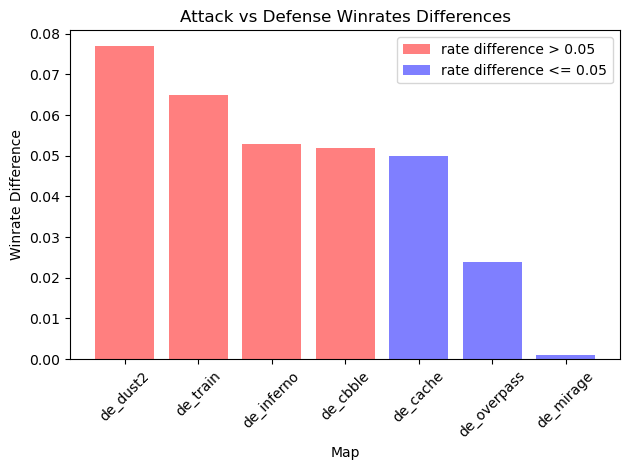

In [41]:
# get the attack and defense sided percentages in scrim play
esea_cmap_rates = spark.sql(
    """SELECT
        map,
        ROUND(SUM(IF(winner_side = 'Terrorist', 1, 0)) / COUNT(round), 3) AS terrorist_winrate,
        ROUND(SUM(IF(winner_side = 'CounterTerrorist', 1, 0)) / COUNT(round), 3) AS counter_terrorist_winrate,
        ROUND(ABS(SUM(IF(winner_side = 'Terrorist', 1, 0)) / COUNT(round) - SUM(IF(winner_side = 'CounterTerrorist', 1, 0)) / COUNT(round)), 3) AS rate_diff
    FROM
        meta_table
    WHERE
        map IN ('de_cache', 'de_cbble', 'de_dust2', 'de_inferno', 'de_mirage', 'de_overpass', 'de_train')
    GROUP BY
        map
    ORDER BY
        rate_diff DESC""")

esea_cmap_rates.show()

# some set up
esea_cmap_rates_pd = esea_cmap_rates.toPandas()
maps = esea_cmap_rates_pd['map']
rate_diff = esea_cmap_rates_pd['rate_diff']
colors = ['blue' if x <= 0.05 else 'red' for x in esea_cmap_rates_pd['rate_diff']]

# plot the data as a bar graph
bars = plt.bar(maps, rate_diff, alpha=0.5, color=colors)

# customize the plot
plt.xlabel('Map')
plt.ylabel('Winrate Difference')
plt.title('Attack vs Defense Winrates Differences')
plt.xticks(rotation=45)

# create custom legend handles and labels
handles = [bars[0], bars[-1]]
labels = ['rate difference > 0.05', 'rate difference <= 0.05']
plt.legend(handles, labels)

# display the plot
plt.tight_layout()
plt.show()

Just to get some more insights, let's bring in the matchmaking data here and see how the balancing pans out here. Since there is no meta table for this data, the query will need to make use of either the `mm_grenades_demos` or `mm_masters_demos` tables, and group the data accordingly.

In [42]:
# get the attack and defense sided percentages in ranked play
mm_map_rates = spark.sql(
    """SELECT
        round_data.map,
        ROUND(SUM(IF(round_data.winner_side = 'Terrorist', 1, 0)) / COUNT(round_data.round), 3) AS terrorist_winrate,
        ROUND(SUM(IF(round_data.winner_side = 'CounterTerrorist', 1, 0)) / COUNT(round_data.round), 3) AS counter_terrorist_winrate,
        ROUND(ABS(SUM(IF(round_data.winner_side = 'Terrorist', 1, 0)) / COUNT(round_data.round) - SUM(IF(round_data.winner_side = 'CounterTerrorist', 1, 0)) / COUNT(round_data.round)), 3) AS rate_diff
    FROM
        (SELECT file, round, MAX(winner_side) AS winner_side, MAX(map) AS map
            FROM mm_table
            GROUP BY file, round
        ) AS round_data
    GROUP BY
        round_data.map
    ORDER BY
        rate_diff DESC""")

mm_map_rates.show(30)

+------------+-----------------+-------------------------+---------+
|         map|terrorist_winrate|counter_terrorist_winrate|rate_diff|
+------------+-----------------+-------------------------+---------+
|cs_insertion|            0.276|                    0.724|    0.448|
|  de_austria|            0.717|                    0.283|    0.434|
|    de_aztec|             0.35|                     0.65|      0.3|
|    cs_italy|            0.638|                    0.362|    0.277|
|     de_dust|            0.422|                    0.578|    0.156|
|   cs_office|            0.574|                    0.426|    0.148|
|de_blackgold|            0.435|                    0.565|     0.13|
|     de_nuke|            0.446|                    0.554|    0.107|
|  de_shipped|            0.448|                    0.552|    0.103|
|    de_cache|            0.539|                    0.461|    0.078|
|    de_cbble|            0.535|                    0.465|    0.069|
|  de_vertigo|            0.466|  

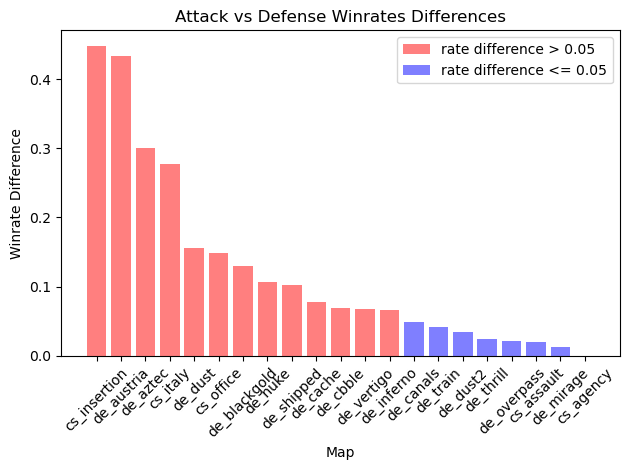

In [43]:
# some set up
mm_map_rates_pd = mm_map_rates.toPandas()
maps = mm_map_rates_pd['map']
rate_diff = mm_map_rates_pd['rate_diff']
colors = ['blue' if x <= 0.05 else 'red' for x in mm_map_rates_pd['rate_diff']]

# plot the data as a bar graph
bars = plt.bar(maps, rate_diff, alpha=0.5, color=colors)

# customize the plot
plt.xlabel('Map')
plt.ylabel('Winrate Difference')
plt.title('Attack vs Defense Winrates Differences')
plt.xticks(rotation=45)

# create custom legend handles and labels
handles = [bars[0], bars[-1]]
labels = ['rate difference > 0.05', 'rate difference <= 0.05']
plt.legend(handles, labels)

# display the plot
plt.tight_layout()
plt.show()

There are a lot more maps here, and some of these are very unbalanced! However, some of these maps are community made (the maps with `cs_` in front of them), while other maps are used for different game modes. So again, we will limit our analysis only to the active duty map pool. Let's update our query to filter out the non competitive maps.

In [44]:
# get the attack and defense sided percentages in ranked play
mm_cmap_rates = spark.sql(
    """SELECT
        round_data.map AS map,
        ROUND(SUM(IF(round_data.winner_side = 'Terrorist', 1, 0)) / COUNT(round_data.round), 3) AS terrorist_winrate,
        ROUND(SUM(IF(round_data.winner_side = 'CounterTerrorist', 1, 0)) / COUNT(round_data.round), 3) AS counter_terrorist_winrate,
        ROUND(ABS(SUM(IF(round_data.winner_side = 'Terrorist', 1, 0)) / COUNT(round_data.round) - SUM(IF(round_data.winner_side = 'CounterTerrorist', 1, 0)) / COUNT(round_data.round)), 3) AS rate_diff
    FROM
        (SELECT file, round, MAX(winner_side) AS winner_side, MAX(map) AS map
            FROM mm_table
            GROUP BY file, round
        ) AS round_data
    WHERE round_data.map IN ('de_cache', 'de_cbble', 'de_dust2', 'de_inferno', 'de_mirage', 'de_overpass', 'de_train')
    GROUP BY round_data.map
    ORDER BY rate_diff DESC""")

mm_cmap_rates.show()

+-----------+-----------------+-------------------------+---------+
|        map|terrorist_winrate|counter_terrorist_winrate|rate_diff|
+-----------+-----------------+-------------------------+---------+
|   de_cache|            0.539|                    0.461|    0.078|
|   de_cbble|            0.535|                    0.465|    0.069|
| de_inferno|            0.534|                    0.466|    0.067|
|   de_train|            0.479|                    0.521|    0.042|
|   de_dust2|            0.517|                    0.483|    0.035|
|de_overpass|            0.511|                    0.489|    0.021|
|  de_mirage|            0.506|                    0.494|    0.013|
+-----------+-----------------+-------------------------+---------+



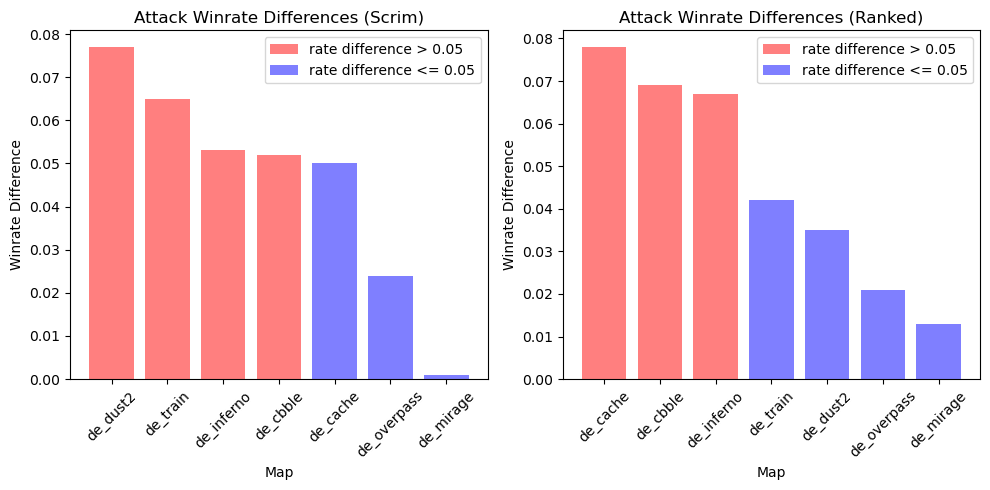

In [45]:
# plot the data as a bar graph
mm_cmap_rates_pd = mm_cmap_rates.toPandas()

# plot two bar graphs next to each other
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# some set up for scrim plot
maps = esea_cmap_rates_pd['map']
rate_diff = esea_cmap_rates_pd['rate_diff']
colors = ['blue' if x <= 0.05 else 'red' for x in esea_cmap_rates_pd['rate_diff']]

# create custom legend handles and labels
bars = axs[0].bar(maps, rate_diff, alpha=0.5, color=colors)
handles = [bars[0], bars[-1]]
labels = ['rate difference > 0.05', 'rate difference <= 0.05']

# customize the scrim plot
axs[0].set_xlabel('Map')
axs[0].set_ylabel('Winrate Difference')
axs[0].set_title('Attack Winrate Differences (Scrim)')
axs[0].set_xticks(range(len(maps)))
axs[0].set_xticklabels(maps, rotation=45)
axs[0].legend(handles, labels)

# some set up for ranked plot
mm_cmap_rates_pd = mm_cmap_rates.toPandas()
maps = mm_cmap_rates_pd['map']
rate_diff = mm_cmap_rates_pd['rate_diff']
colors = ['blue' if x <= 0.05 else 'red' for x in mm_cmap_rates_pd['rate_diff']]

# create custom legend handles and labels
bars = axs[1].bar(maps, rate_diff, alpha=0.5, color=colors)
handles = [bars[0], bars[-1]]
labels = ['rate difference > 0.05', 'rate difference <= 0.05']

# customize the ranked plot
axs[1].set_xlabel('Map')
axs[1].set_ylabel('Winrate Difference')
axs[1].set_title('Attack Winrate Differences (Ranked)')
axs[1].set_xticks(range(len(maps)))
axs[1].set_xticklabels(maps, rotation=45)
axs[1].legend(handles, labels)

# display the plot
plt.tight_layout()
plt.show()

It looks like the rates are pretty similar for the scrim data and the ranked data, just that some of the maps are swapped around. Mirage remains the most balanced map in both scenarios, really supporting the idea that it is one the best designed maps out there. Either way, the win rate differences for all maps are below 10% which is pretty good! But for how much CS:GO players claim their maps are the most balanced, I was expecting to see differences under 3 or maybe even 5 percent. But to be fair, this data is a subset of all player data.

---

## Econ Similarities to Valorant <a name="econ"></a>

The next question that we want to address is how similar the econ works in CS:GO when compared to Valorant. In particular, we want to look at the first three rounds of each half. This is where the buying of guns is interesting because teams cannot full buy (buy the best weapons) yet. Here is a quick summary of how the first three rounds _should_ work.

The **first round** is what is known as a pistol round. Both teams can only afford pistols. Let's say that Team A wins the pistol round.

The **second round** should be a save round for Team B, since they lost the pistol round. This means that they should not buy any guns or utility. Some teams may do what's called a force buy where they will buy what they can, but unless you have a good reason to (you're down 10+ rounds and are desperate) you should not.<br>
Team A should buy up what they can here (this will mostly be mid tier guns, like smgs). They are favored to win this round since Team B is expected to be saving.<br>

In the **third round** is where things get interesting, and this is where I want to see if CS:GO's econ meta follows the same pattern as Valorant's. After winning the first two rounds, Team A should _not_ buy up. They will have what's called a bonus round where they only spend enough money so that they can have a full buy in the fourth round. They are projected to lose this round.<br>
Meanwhile, Team B will buy up. So they will have all utility and top tier guns while Team B has middle tier guns. Team B is favored to win this round.

**TLDR:** the team that wins pistol round should buy up second round (mid tier guns), save third round, and the projected scoreline is 2-1.<br>
The team that loses pistol round should save second round, and buy up third round (high tier guns), and the projected scoreline is 1-2.

We will first look at the starts of the first half (rounds 1 and 2) and the second half (rounds 16 and 17) to see if the losing team saves and loses round 2, while the winning team buys up and wins round 2 for the most part. The first round of each half is also called the pistol round.

The cheapest smg/shotgun in CS:GO is priced at 1050. We will say that the winning team buys up if each member spends at least this much and an additional 350 each for either utility or shields, so for a total of 7000. We will consider that the winning team is saving otherwise.

**Note:** we will only look at the scrim data here because ranked players don't always play as a team and may not buy and save together (when they should).

We will begin by restructuring the data so that we have the first two rounds of each half, verify that our data makes sense, and then condense this data so that we have one row per half start with the following data: start round (1 or 16), if the winning team won both rounds, and if the winning team bought up second round.

In [46]:
# restructure the table so that we can see the first two rounds of each half
round_winners = spark.sql(
    """SELECT
        r1.file,
        r1.round AS round1,
        r1.winner_team AS r1_winner,
        r2.round AS round2,
        r2.winner_team AS r2_winner,
        IF(IF(r1.winner_side = 'Terrorist', r2.t_eq_val, r2.ct_eq_val) > 7000, 1, 0) AS r1_winners_buy_up
    FROM
        meta_table AS r1
    INNER JOIN
        meta_table AS r2 ON r1.file = r2.file
    WHERE
        (r1.round = 1 AND r2.round = 2)
        OR (r1.round = 16 AND r2.round = 17)
    LIMIT 20""")

round_winners.show(truncate=False)

+-----------------------+------+---------+------+---------+-----------------+
|file                   |round1|r1_winner|round2|r2_winner|r1_winners_buy_up|
+-----------------------+------+---------+------+---------+-----------------+
|esea_match_13824556.dem|1     |Team 2   |2     |Team 1   |1                |
|esea_match_13824556.dem|16    |Team 2   |17    |Team 2   |1                |
|esea_match_13825195.dem|1     |Team 1   |2     |Team 1   |1                |
|esea_match_13825195.dem|16    |Team 2   |17    |Team 2   |1                |
|esea_match_13824352.dem|1     |Team 2   |2     |Team 2   |1                |
|esea_match_13824352.dem|16    |Team 1   |17    |Team 2   |1                |
|esea_match_13824578.dem|1     |Team 1   |2     |Team 1   |1                |
|esea_match_13824578.dem|16    |Team 2   |17    |Team 1   |1                |
|esea_match_13824626.dem|1     |Team 2   |2     |Team 2   |1                |
|esea_match_13824626.dem|16    |Team 2   |17    |Team 1   |1    

In [47]:
# verify the above query with two examples: esea_match_13821630.dem and esea_match_13823776.dem
validation_p1 = spark.sql(
    """SELECT
        r1.file,
        r1.round AS round1,
        r1.winner_team AS r1_winner,
        r2.round AS round2,
        r2.winner_team AS r2_winner,
        IF(IF(r1.winner_side = 'Terrorist', r2.t_eq_val, r2.ct_eq_val) > 7000, 1, 0) AS r1_winners_buy_up
    FROM
        meta_table AS r1
    INNER JOIN
        meta_table AS r2 ON r1.file = r2.file
    WHERE
        (r1.file = 'esea_match_13823776.dem' OR r1.file = 'esea_match_13821630.dem')
        AND ((r1.round = 1 AND r2.round = 2)
            OR (r1.round = 16 AND r2.round = 17))""")

validation_p1.show(truncate=False)

validation_p2 = spark.sql(
    """SELECT
        file,
        map,
        round,
        winner_team,
        winner_side,
        t_eq_val,
        ct_eq_val
    FROM
        meta_table
    WHERE
        (file = 'esea_match_13823776.dem' OR file = 'esea_match_13821630.dem')
        AND (round = 1 OR round = 2 OR round = 16 OR round = 17)""")

validation_p2.show(truncate=False)

+-----------------------+------+---------+------+---------+-----------------+
|file                   |round1|r1_winner|round2|r2_winner|r1_winners_buy_up|
+-----------------------+------+---------+------+---------+-----------------+
|esea_match_13821630.dem|1     |Team 2   |2     |Team 2   |1                |
|esea_match_13821630.dem|16    |Team 2   |17    |Team 2   |1                |
|esea_match_13823776.dem|1     |Team 2   |2     |Team 1   |1                |
|esea_match_13823776.dem|16    |Team 2   |17    |Team 1   |1                |
+-----------------------+------+---------+------+---------+-----------------+

+-----------------------+--------+-----+-----------+----------------+--------+---------+
|file                   |map     |round|winner_team|winner_side     |t_eq_val|ct_eq_val|
+-----------------------+--------+-----+-----------+----------------+--------+---------+
|esea_match_13821630.dem|de_cache|1    |Team 2     |Terrorist       |4400    |4200     |
|esea_match_1382163

In [48]:
# now restructure data to have one row per half start with data on if winning team won both
win_both = spark.sql(
    """SELECT
        round_winners.file,
        round_winners.round1 AS start_round,
        IF(round_winners.r1_winner = round_winners.r2_winner, 1, 0) AS win_both,
        round_winners.r1_winners_buy_up
    FROM
        (
            SELECT
                r1.file,
                r1.round AS round1,
                r1.winner_team AS r1_winner,
                r2.round AS round2,
                r2.winner_team AS r2_winner,
                IF(IF(r1.winner_side = 'Terrorist', r2.t_eq_val, r2.ct_eq_val) > 7000, 1, 0) AS r1_winners_buy_up
            FROM
                meta_table AS r1
            INNER JOIN
                meta_table AS r2 ON r1.file = r2.file
            WHERE
                (r1.round = 1 AND r2.round = 2)
                OR (r1.round = 16 AND r2.round = 17)
        ) AS round_winners
    LIMIT 20""")

win_both.show(truncate=False)

+-----------------------+-----------+--------+-----------------+
|file                   |start_round|win_both|r1_winners_buy_up|
+-----------------------+-----------+--------+-----------------+
|esea_match_13790546.dem|1          |1       |1                |
|esea_match_13790546.dem|16         |0       |1                |
|esea_match_13790761.dem|1          |1       |1                |
|esea_match_13790761.dem|16         |1       |1                |
|esea_match_13791142.dem|1          |1       |1                |
|esea_match_13791142.dem|16         |1       |1                |
|esea_match_13791414.dem|1          |0       |1                |
|esea_match_13791414.dem|16         |1       |1                |
|esea_match_13792097.dem|1          |0       |1                |
|esea_match_13792399.dem|1          |0       |1                |
|esea_match_13792399.dem|16         |1       |1                |
|esea_match_13792549.dem|1          |0       |1                |
|esea_match_13792549.dem|

Now that we have our data set up, we will consider the two cases:
- **Case 1:** round 1 winners save
- **Case 2:** round 1 winners buy up

We should expect to see a close to 50% win rate for case 1 and a well over 50% win rate for case 2.<br>
Let's plot. We will use the queries that we constructed above, except we will aggregate them to get the win percentages for when the winning team buys up or saves: `team won both rounds / round count * 100`

In [49]:
# case 1: winners save query
case_1 = spark.sql(
    """SELECT
        "winners_save",
        SUM(case_1.win_both) / COUNT(*) * 100 AS win_percentage
    FROM
        (
            SELECT
                round_winners.file,
                round_winners.round1 AS start_round,
                IF(round_winners.r1_winner = round_winners.r2_winner, 1, 0) AS win_both
            FROM
                (
                    SELECT
                        r1.file,
                        r1.round AS round1,
                        r1.winner_team AS r1_winner,
                        r2.round AS round2,
                        r2.winner_team AS r2_winner,
                        IF(IF(r1.winner_side = 'Terrorist', r2.t_eq_val, r2.ct_eq_val) > 7000, 1, 0) AS r1_winners_buy_up
                    FROM
                        meta_table AS r1
                    INNER JOIN
                        meta_table AS r2 ON r1.file = r2.file
                    WHERE
                        (r1.round = 1 AND r2.round = 2)
                        OR (r1.round = 16 AND r2.round = 17)
                ) AS round_winners
            WHERE
                round_winners.r1_winners_buy_up = 0
        ) AS case_1""")

# case 2: winners buy up query
case_2 = spark.sql(
    """SELECT
        "winners_buy",
        SUM(case_2.win_both) / COUNT(*) * 100 AS win_percentage
    FROM
        (
            SELECT
                round_winners.file,
                round_winners.round1 AS start_round,
                IF(round_winners.r1_winner = round_winners.r2_winner, 1, 0) AS win_both
            FROM
                (
                    SELECT
                        r1.file,
                        r1.round AS round1,
                        r1.winner_team AS r1_winner,
                        r2.round AS round2,
                        r2.winner_team AS r2_winner,
                        IF(IF(r1.winner_side = 'Terrorist', r2.t_eq_val, r2.ct_eq_val) > 7000, 1, 0) AS r1_winners_buy_up
                    FROM
                        meta_table AS r1
                    INNER JOIN
                        meta_table AS r2 ON r1.file = r2.file
                    WHERE
                        (r1.round = 1 AND r2.round = 2)
                        OR (r1.round = 16 AND r2.round = 17)
                ) AS round_winners
            WHERE
                round_winners.r1_winners_buy_up = 1
        ) AS case_2""")

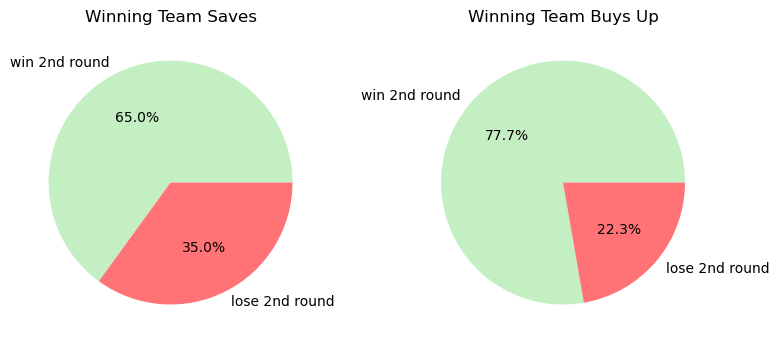

In [50]:
# create pie charts for both cases to compare
case_1_pd = case_1.toPandas()
case_2_pd = case_2.toPandas()

fig, axs = plt.subplots(1, 2, figsize=(8, 5))
labels = ["win 2nd round", "lose 2nd round"]
colors = ['#C3EFC3', '#FF7377']

# pie chart for case 1
win_percentage = case_1_pd.iloc[0,1]
wedges = [win_percentage, 100 - win_percentage]

axs[0].set_title("Winning Team Saves")
axs[0].pie(wedges, labels=labels, colors=colors, autopct='%1.1f%%')

# pie chart for case 2
win_percentage = case_2_pd.iloc[0,1]
wedges = [win_percentage, 100 - win_percentage]

axs[1].set_title("Winning Team Buys Up")
axs[1].pie(wedges, labels=labels, colors=colors, autopct='%1.1f%%')


# display the plot
plt.tight_layout()
plt.show()

Case 2 is as expected. When the team that won round 1 bought up, they won 77.7% of the time!<br>
Case 1, however, is a bit unexpected. When the winning team saved, they still won 65% of the time. Even though this is less than if they were to buy up, I would've expected it to be a bit closer to 50%. Let's take a closer look at the data.

In [51]:
# case 1 query and results
case_1_val = spark.sql(
    """SELECT
        "winners save" AS case_1,
        SUM(case_1.win_both) AS wins,
        COUNT(*) AS total
    FROM
        (
            SELECT
                round_winners.file,
                round_winners.round1 AS start_round,
                IF(round_winners.r1_winner = round_winners.r2_winner, 1, 0) AS win_both
            FROM
                (
                    SELECT
                        r1.file,
                        r1.round AS round1,
                        r1.winner_team AS r1_winner,
                        r2.round AS round2,
                        r2.winner_team AS r2_winner,
                        IF(IF(r1.winner_side = 'Terrorist', r2.t_eq_val, r2.ct_eq_val) > 7000, 1, 0) AS r1_winners_buy_up
                    FROM
                        meta_table AS r1
                    INNER JOIN
                        meta_table AS r2 ON r1.file = r2.file
                    WHERE
                        (r1.round = 1 AND r2.round = 2)
                        OR (r1.round = 16 AND r2.round = 17)
                ) AS round_winners
            WHERE
                round_winners.r1_winners_buy_up = 0
        ) AS case_1""")

# case 2 query and results
case_2_val = spark.sql(
    """SELECT
        "winners buy" AS case_2,
        SUM(case_2.win_both) AS wins,
        COUNT(*) AS total
    FROM
        (
            SELECT
                round_winners.file,
                round_winners.round1 AS start_round,
                IF(round_winners.r1_winner = round_winners.r2_winner, 1, 0) AS win_both
            FROM
                (
                    SELECT
                        r1.file,
                        r1.round AS round1,
                        r1.winner_team AS r1_winner,
                        r2.round AS round2,
                        r2.winner_team AS r2_winner,
                        IF(IF(r1.winner_side = 'Terrorist', r2.t_eq_val, r2.ct_eq_val) > 7000, 1, 0) AS r1_winners_buy_up
                    FROM
                        meta_table AS r1
                    INNER JOIN
                        meta_table AS r2 ON r1.file = r2.file
                    WHERE
                        (r1.round = 1 AND r2.round = 2)
                        OR (r1.round = 16 AND r2.round = 17)
                ) AS round_winners
            WHERE
                round_winners.r1_winners_buy_up = 1
        ) AS case_2""")

# show results for both cases to compare
case_1_val.show()
case_2_val.show()

+------------+----+-----+
|      case_1|wins|total|
+------------+----+-----+
|winners save|  26|   40|
+------------+----+-----+

+-----------+-----+-----+
|     case_2| wins|total|
+-----------+-----+-----+
|winners buy|20814|26776|
+-----------+-----+-----+



Okay, this makes a lot more sense. The amount of teams that save after a pistol round win is extremely tiny compared to the amount of teams that buy up. This tells us two things. First, that teams are indeed buying up after they win (as they should). This is exactly the behavior that is seen in valorant! Second, the high win percentage for winning teams that saved can be blamed on the small sample size.

Now, we will take a look at the third round. To simplify the analysis, we will only consider teams that followed the correct protocol (the winning team bought up) and won the second round. This way, we can eliminate unexpected round 3 behavior.

Again, we have two cases.
- **Case 3:** winning team buys full loadout
- **Case 4:** winning team buys minimal guns/utility

For case 3, we expect a close to 50% win rate (but should still be lower than 50%), while case 4 we expect a way below 50% win rate. As per valorant protocol, the winning team should not buy full loadouts and take the L for the round. This is done to help the winning team's economy in the long run. To buy a full loadout means that teammates throw away their mid tier guns for more expensive guns. This is unnecessary because if they lose this round they will be in a lot of trouble when round 4 comes around. Round 4, in valorant, is considered the first "real" round as it's when both teams should have full loadouts. Let's see if this is the case here.

We will say that the winning team has bought up if they have more than 2 rifles on their team. It is normal for 1 or 2 of the players that died previously to buy up so that the team may have 1 or 2 rifles on their side (at least in valorant). This is known as a half buy.

As per https://www.hotspawn.com/csgo/guides/understanding-economy-in-csgo,
> 3750 is the minimum amount needed for an M4 and armor with no helmet as a CT. Head armor is not always needed during a gun round because Ak-47’s already kill with a single headshot.<br>4100 is the amount needed for full armor and a rifle as a CT.

As per https://esportsedition.com/csgo/noobs-guide-to-buying-items,
> A half buy round is typical when some players on a team have enough money for a full buy but others don’t quite have the funds. Counter-Terrorists can spend anywhere from 3750-4950, while it will cost Terrorists around 3700-4500.<br>
>\[A full buy\] will cost anywhere between 5000-5600 for Terrorists, and 5850-6200 for Counter-Terrorists.

To simplify definitions, we will say that the winning team has bought up if their equipment value surpasses 3750 * 3 + 4100 * 2 = 19,450. In other words, to say that the winning team did not buy up means that they can have 3 teammates with a "half buy" (guns saved from the previous round where they bought up) and at most 2 teammates with an almost "full buy" (rifle and full armor). Of course, this isn't a perfect definition, but it should be okay for these purposes.

We will use a similar approach as above, except we will add round 3 into the mix to get one row per half with the data: start round (1 or 16), winning team (of both first two rounds), round 3 winner, if winners fully bought up, if losers fully bought up.

In [52]:
# check out the target rounds
target_rounds = spark.sql(
    """SELECT
        round_winners.file,
        round_winners.round1 AS start_round,
        round_winners.r2_winner AS winning_team,
        round_winners.r3_winner AS r3_winner,
        IF(IF(round_winners.r3_winner_side = 'Terrorist', round_winners.r3_t_value, round_winners.r3_ct_value) > 19450, 1, 0) AS winners_full_buy,
        IF(IF(round_winners.r3_winner_side = 'Terrorist', round_winners.r3_ct_value, round_winners.r3_t_value) > 19450, 1, 0) AS losers_full_buy
    FROM
        (
            SELECT
                r1.file,
                r1.round AS round1,
                r1.winner_team AS r1_winner,
                r2.round AS round2,
                r2.winner_team AS r2_winner,
                IF(IF(r1.winner_side = 'Terrorist', r2.t_eq_val, r2.ct_eq_val) > 7000, 1, 0) AS r1_winners_buy_up,
                r3.winner_team AS r3_winner,
                r3.winner_side AS r3_winner_side,
                r3.t_eq_val AS r3_t_value,
                r3.ct_eq_val AS r3_ct_value
            FROM
                meta_table AS r1
            INNER JOIN
                meta_table AS r2 ON r1.file = r2.file
            INNER JOIN
                meta_table AS r3 ON r2.file = r3.file
            WHERE
                (r1.round = 1 AND r2.round = 2 AND r3.round = 3)
                OR (r1.round = 16 AND r2.round = 17 AND r3.round = 18)
        ) AS round_winners
    WHERE
        round_winners.r1_winners_buy_up = 1
        AND IF(round_winners.r1_winner = round_winners.r2_winner, 1, 0) = 1
    LIMIT 20""")

target_rounds.show(truncate=False)

+-----------------------+-----------+------------+---------+----------------+---------------+
|file                   |start_round|winning_team|r3_winner|winners_full_buy|losers_full_buy|
+-----------------------+-----------+------------+---------+----------------+---------------+
|esea_match_13780278.dem|16         |Team 1      |Team 2   |0               |1              |
|esea_match_13780637.dem|1          |Team 2      |Team 2   |0               |0              |
|esea_match_13780637.dem|16         |Team 1      |Team 1   |1               |0              |
|esea_match_13782114.dem|16         |Team 2      |Team 2   |1               |0              |
|esea_match_13782185.dem|1          |Team 1      |Team 1   |1               |0              |
|esea_match_13782185.dem|16         |Team 2      |Team 2   |1               |1              |
|esea_match_13779879.dem|16         |Team 1      |Team 1   |1               |0              |
|esea_match_13780538.dem|1          |Team 1      |Team 1   |

We don't see as many of the winning teams losing the third round as we would expect, so let's take a look at the data more closely.

In [53]:
# look at examples: esea_match_13824556.dem and esea_match_13826571.dem
target_val1 = spark.sql(
    """SELECT
        r1.file,
        r1.round AS round1,
        r1.winner_team AS r1_winner,
        r2.round AS round2,
        r2.winner_team AS r2_winner,
        IF(IF(r1.winner_side = 'Terrorist', r2.t_eq_val, r2.ct_eq_val) > 7000, 1, 0) AS r1_winners_buy_up,
        r3.winner_team AS r3_winner
    FROM
        meta_table AS r1
    INNER JOIN
        meta_table AS r2 ON r1.file = r2.file
    INNER JOIN
        meta_table AS r3 ON r2.file = r3.file
    WHERE
        (r1.file = 'esea_match_13824556.dem' OR r1.file = 'esea_match_13826571.dem')
        AND ((r1.round = 1 AND r2.round = 2 AND r3.round = 3)
            OR (r1.round = 16 AND r2.round = 17 AND r3.round = 18))
        AND IF(IF(r1.winner_side = 'Terrorist', r2.t_eq_val, r2.ct_eq_val) > 7000, 1, 0) = 1
        AND IF(r1.winner_team = r2.winner_team, 1, 0) = 1""")

target_val1.show(truncate=False)

target_val2 = spark.sql(
    """SELECT
        file,
        round,
        winner_team,
        winner_side,
        t_eq_val,
        ct_eq_val
    FROM
        meta_table
    WHERE
        (file = 'esea_match_13824556.dem' OR file = 'esea_match_13826571.dem')
        AND (round = 1 OR round = 2 OR round = 3 OR round = 16 OR round = 17 OR round = 18)""")

target_val2.show(truncate=False)

+-----------------------+------+---------+------+---------+-----------------+---------+
|file                   |round1|r1_winner|round2|r2_winner|r1_winners_buy_up|r3_winner|
+-----------------------+------+---------+------+---------+-----------------+---------+
|esea_match_13824556.dem|16    |Team 2   |17    |Team 2   |1                |Team 2   |
|esea_match_13826571.dem|1     |Team 1   |2     |Team 1   |1                |Team 1   |
|esea_match_13826571.dem|16    |Team 1   |17    |Team 1   |1                |Team 2   |
+-----------------------+------+---------+------+---------+-----------------+---------+

+-----------------------+-----+-----------+----------------+--------+---------+
|file                   |round|winner_team|winner_side     |t_eq_val|ct_eq_val|
+-----------------------+-----+-----------+----------------+--------+---------+
|esea_match_13824556.dem|1    |Team 2     |Terrorist       |3650    |4300     |
|esea_match_13824556.dem|2    |Team 1     |CounterTerrorist|127

The query checks out. It looks like the weirdness is because the losing team isn't fully buying up in the third round like in valorant. So maybe econ is handled differently. The last group of rows (rounds 16-18 for  `esea_match_13826571.dem`) shows the behavior that I would expect in valorant. Let's make some graphs.

In [54]:
case_3 = spark.sql(
    """SELECT
        "winners_full_buy",
        SUM(case_3.winners_win) / COUNT(*) * 100 AS win_percentage
    FROM
        (
            SELECT
                IF(target.winning_team = target.r3_winner, 1, 0) AS winners_win
            FROM
                (
                    SELECT
                        round_winners.file,
                        round_winners.round1 AS start_round,
                        round_winners.r2_winner AS winning_team,
                        round_winners.r3_winner AS r3_winner,
                        IF(IF(round_winners.r3_winner_side = 'Terrorist', round_winners.r3_t_value, round_winners.r3_ct_value) > 19450, 1, 0) AS winners_full_buy,
                        IF(IF(round_winners.r3_winner_side = 'Terrorist', round_winners.r3_ct_value, round_winners.r3_t_value) > 19450, 1, 0) AS losers_full_buy
                    FROM
                        (
                            SELECT
                                r1.file,
                                r1.round AS round1,
                                r1.winner_team AS r1_winner,
                                r2.round AS round2,
                                r2.winner_team AS r2_winner,
                                IF(IF(r1.winner_side = 'Terrorist', r2.t_eq_val, r2.ct_eq_val) > 7000, 1, 0) AS r1_winners_buy_up,
                                r3.winner_team AS r3_winner,
                                r3.winner_side AS r3_winner_side,
                                r3.t_eq_val AS r3_t_value,
                                r3.ct_eq_val AS r3_ct_value
                            FROM
                                meta_table AS r1
                            INNER JOIN
                                meta_table AS r2 ON r1.file = r2.file
                            INNER JOIN
                                meta_table AS r3 ON r2.file = r3.file
                            WHERE
                                (r1.round = 1 AND r2.round = 2 AND r3.round = 3)
                                OR (r1.round = 16 AND r2.round = 17 AND r3.round = 18)
                        ) AS round_winners
                    WHERE
                        round_winners.r1_winners_buy_up = 1
                        AND IF(round_winners.r1_winner = round_winners.r2_winner, 1, 0) = 1
                        AND IF(IF(round_winners.r3_winner_side = 'Terrorist', round_winners.r3_t_value, round_winners.r3_ct_value) > 19450, 1, 0) = 1
                ) AS target
        ) case_3""")

case_4 = spark.sql(
    """SELECT
        "winners_bonus",
        SUM(case_4.winners_win) / COUNT(*) * 100 AS win_percentage
    FROM
        (
            SELECT
                IF(target.winning_team = target.r3_winner, 1, 0) AS winners_win
            FROM
                (
                    SELECT
                        round_winners.file,
                        round_winners.round1 AS start_round,
                        round_winners.r2_winner AS winning_team,
                        round_winners.r3_winner AS r3_winner,
                        IF(IF(round_winners.r3_winner_side = 'Terrorist', round_winners.r3_t_value, round_winners.r3_ct_value) > 19450, 1, 0) AS winners_full_buy,
                        IF(IF(round_winners.r3_winner_side = 'Terrorist', round_winners.r3_ct_value, round_winners.r3_t_value) > 19450, 1, 0) AS losers_full_buy
                    FROM
                        (
                            SELECT
                                r1.file,
                                r1.round AS round1,
                                r1.winner_team AS r1_winner,
                                r2.round AS round2,
                                r2.winner_team AS r2_winner,
                                IF(IF(r1.winner_side = 'Terrorist', r2.t_eq_val, r2.ct_eq_val) > 7000, 1, 0) AS r1_winners_buy_up,
                                r3.winner_team AS r3_winner,
                                r3.winner_side AS r3_winner_side,
                                r3.t_eq_val AS r3_t_value,
                                r3.ct_eq_val AS r3_ct_value
                            FROM
                                meta_table AS r1
                            INNER JOIN
                                meta_table AS r2 ON r1.file = r2.file
                            INNER JOIN
                                meta_table AS r3 ON r2.file = r3.file
                            WHERE
                                (r1.round = 1 AND r2.round = 2 AND r3.round = 3)
                                OR (r1.round = 16 AND r2.round = 17 AND r3.round = 18)
                        ) AS round_winners
                    WHERE
                        round_winners.r1_winners_buy_up = 1
                        AND IF(round_winners.r1_winner = round_winners.r2_winner, 1, 0) = 1
                        AND IF(IF(round_winners.r3_winner_side = 'Terrorist', round_winners.r3_t_value, round_winners.r3_ct_value) > 19450, 1, 0) = 0
                ) AS target
        ) case_4""")

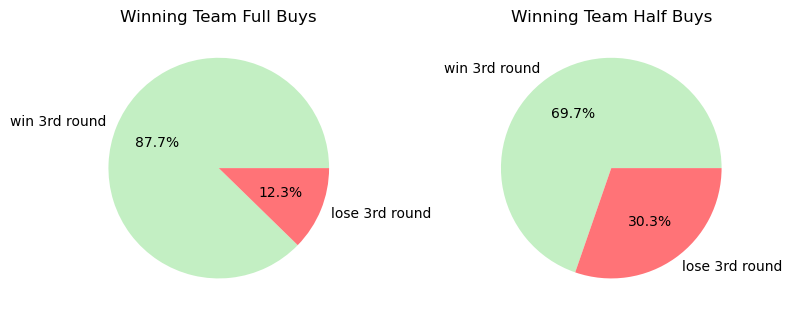

In [55]:
# create pie charts for both cases to compare
case_3_pd = case_3.toPandas()
case_4_pd = case_4.toPandas()

fig, axs = plt.subplots(1, 2, figsize=(8, 5))
labels = ["win 3rd round", "lose 3rd round"]
colors = ['#C3EFC3', '#FF7377']

# pie chart for case 3
win_percentage = case_3_pd.iloc[0,1]
wedges = [win_percentage, 100 - win_percentage]

axs[0].set_title("Winning Team Full Buys")
axs[0].pie(wedges, labels=labels, colors=colors, autopct='%1.1f%%')

# pie chart for case 4
win_percentage = case_4_pd.iloc[0,1]
wedges = [win_percentage, 100 - win_percentage]

axs[1].set_title("Winning Team Half Buys")
axs[1].pie(wedges, labels=labels, colors=colors, autopct='%1.1f%%')

# display the plot
plt.tight_layout()
plt.show()

These results were not expected at all. But I suspect it's because of the way the losing team is buying (we caught a glimpse of this earlier when looking at the table data). It seems that they do not have enough money in the 3rd round to full buy. This could mean that the losing team isn't saving in their second round, which is not expected behavior (at least for valorant) or maybe they are just not given enough money each round they lose (as compared to valorant). Either way, let's confirm that the reason the results are unexpected is because the losing team is not full buying in the third round (for whatever reason). We will simply pull the percentage of full buys.

In [56]:
losers_buy = spark.sql(
    """SELECT
        "losers_full_buy" AS case,
        SUM(target.losers_full_buy) / COUNT(*) * 100 AS losers_full_buy_percentage
    FROM
        (
            SELECT
                round_winners.file,
                round_winners.round1 AS start_round,
                IF(IF(round_winners.r3_winner_side = 'Terrorist', round_winners.r3_ct_value, round_winners.r3_t_value) > 19450, 1, 0) AS losers_full_buy
            FROM
                (
                    SELECT
                        r1.file,
                        r1.round AS round1,
                        r1.winner_team AS r1_winner,
                        r2.winner_team AS r2_winner,
                        IF(IF(r1.winner_side = 'Terrorist', r2.t_eq_val, r2.ct_eq_val) > 7000, 1, 0) AS r1_winners_buy_up,
                        r3.winner_team AS r3_winner,
                        r3.winner_side AS r3_winner_side,
                        r3.t_eq_val AS r3_t_value,
                        r3.ct_eq_val AS r3_ct_value
                    FROM
                        meta_table AS r1
                    INNER JOIN
                        meta_table AS r2 ON r1.file = r2.file
                    INNER JOIN
                        meta_table AS r3 ON r2.file = r3.file
                    WHERE
                        (r1.round = 1 AND r2.round = 2 AND r3.round = 3)
                        OR (r1.round = 16 AND r2.round = 17 AND r3.round = 18)
                ) AS round_winners
            WHERE
                round_winners.r1_winners_buy_up = 1
                AND IF(round_winners.r1_winner = round_winners.r2_winner, 1, 0) = 1
        ) AS target""")

losers_buy.show()

+---------------+--------------------------+
|           case|losers_full_buy_percentage|
+---------------+--------------------------+
|losers_full_buy|         21.52440209994167|
+---------------+--------------------------+



Yep, interestingly enough, losers are unable to full buy their third round. This is unlike valorant where the team that lost the first two rounds will almost always be able to full buy the third round since they saved the second round. This does not seem to be the same for CS:GO, thus, we can conclude that the econ meta between the two games differs. Which makes sense now that I think about it because CS:GO has 15 round halves while valorant has 12 round halves, so the awards in valorant might be a bit higher. Also, CS:GO econ seems more complex in general.

---

## Does First Blood Matter? <a name="firstblood"></a>

Let's now see if first blood helps the terrorist players while not doing much for the counter terrorist players. We will use the `esea_master_kills_demos` data to figure out which team obtained the first blood in each round. We will then cross reference this with the `esea_meta_demos` data to see which team ended up winning the round.

Note that since we are using the kills data, the rounds that are replayed may add some inaccurate entries (ex: team A gets the first kill, but the round is replayed and team B gets the next first kill and then the round win). But without analyzing each round individually, it is hard to determine if a round has actually been replayed.

In [57]:
# check out some first blood data
first_blood = spark.sql(
    """SELECT
        kills_table.file,
        kills_table.round,
        MAX(kills_table.att_team),
        MAX(kills_table.att_side),
        MAX(kills_table.ct_alive),
        MAX(kills_table.t_alive),
        MAX(meta_table.winner_side)
    FROM
        kills_table
    LEFT JOIN
        meta_table
            ON meta_table.file = kills_table.file
                AND meta_table.round = kills_table.round
    WHERE
        (kills_table.ct_alive = 5 AND kills_table.t_alive = 4)
        OR (kills_table.ct_alive = 4 AND kills_table.t_alive = 5)
    GROUP BY
        kills_table.file,
        kills_table.round,
        kills_table.seconds
    ORDER BY
        kills_table.file,
        kills_table.round
    LIMIT 20""")

first_blood.show(truncate=False)

+-----------------------+-----+----------------+----------------+-------------+------------+----------------+
|file                   |round|max(att_team)   |max(att_side)   |max(ct_alive)|max(t_alive)|max(winner_side)|
+-----------------------+-----+----------------+----------------+-------------+------------+----------------+
|esea_match_13770997.dem|1    |Animal Style    |CounterTerrorist|5            |4           |Terrorist       |
|esea_match_13770997.dem|2    |Hentai Hooligans|Terrorist       |4            |5           |Terrorist       |
|esea_match_13770997.dem|3    |Animal Style    |CounterTerrorist|5            |4           |Terrorist       |
|esea_match_13770997.dem|4    |Animal Style    |CounterTerrorist|5            |4           |Terrorist       |
|esea_match_13770997.dem|5    |Hentai Hooligans|Terrorist       |4            |5           |CounterTerrorist|
|esea_match_13770997.dem|6    |Hentai Hooligans|Terrorist       |4            |5           |Terrorist       |
|esea_matc

We are missing some winner information from the `meta_table`. Maybe this is related to the round replays?

In [58]:
# missing round 16 winner
missing = spark.sql(
    """SELECT
        file,
        round,
        att_team,
        att_side,
        ct_alive,
        t_alive
    FROM
        kills_table
    WHERE
        file = 'esea_match_13770997.dem'
        AND round = 16""")

missing.show(truncate=False)

+-----------------------+-----+----------------+----------------+--------+-------+
|file                   |round|att_team        |att_side        |ct_alive|t_alive|
+-----------------------+-----+----------------+----------------+--------+-------+
|esea_match_13770997.dem|16   |Hentai Hooligans|CounterTerrorist|5       |4      |
|esea_match_13770997.dem|16   |Hentai Hooligans|CounterTerrorist|5       |3      |
|esea_match_13770997.dem|16   |Hentai Hooligans|CounterTerrorist|5       |2      |
|esea_match_13770997.dem|16   |Animal Style    |Terrorist       |4       |2      |
|esea_match_13770997.dem|16   |Hentai Hooligans|CounterTerrorist|4       |1      |
|esea_match_13770997.dem|16   |Hentai Hooligans|CounterTerrorist|4       |0      |
+-----------------------+-----+----------------+----------------+--------+-------+



Nope, nothing strange is happening in this round, just missing data. So we will now calculate the first blood impact by first querying for the winner side of each round and which team won the first fight. We will then filter for only the rounds where the Terrorists won the first fight (or Counter Terrorist when looking at the defenders). Next, we will count how many of these rounds resulted in a win and get this as a percentage.

Starting with the terrorist side, we will filter the kills data for the rounds in which the Terrorists win the first fight and the winner of the round is known. Next, we will count how many of these rounds resulted in a win and get this as a percentage. We do the same for counter terrorist side.

In [59]:
attackers_first_blood = spark.sql(
    """SELECT
        "attackers_first_blood" AS target,
        SUM(sub.first_blood_round_win) AS win_count,
        COUNT(*) AS total,
        SUM(sub.first_blood_round_win) / COUNT(*) * 100 AS first_blood_win_percentage
    FROM
        (
            SELECT
                IF(meta_table.winner_side = "Terrorist", 1, 0) AS first_blood_round_win
            FROM
                kills_table
            LEFT JOIN
                meta_table
                    ON meta_table.file = kills_table.file
                        AND meta_table.round = kills_table.round
            WHERE
                ((kills_table.ct_alive = 5 AND kills_table.t_alive = 4)
                OR (kills_table.ct_alive = 4 AND kills_table.t_alive = 5))
                AND att_side = 'Terrorist'
                AND winner_side IS NOT NULL
        ) AS sub""")

defenders_first_blood = spark.sql(
    """SELECT
        "defenders_first_blood" AS target,
        SUM(sub.first_blood_round_win) AS win_count,
        COUNT(*) AS total,
        SUM(sub.first_blood_round_win) / COUNT(*) * 100 AS first_blood_win_percentage
    FROM
        (
            SELECT
                IF(meta_table.winner_side = "CounterTerrorist", 1, 0) AS first_blood_round_win
            FROM
                kills_table
            LEFT JOIN
                meta_table
                    ON meta_table.file = kills_table.file
                        AND meta_table.round = kills_table.round
            WHERE
                ((kills_table.ct_alive = 5 AND kills_table.t_alive = 4)
                OR (kills_table.ct_alive = 4 AND kills_table.t_alive = 5))
                AND att_side = 'CounterTerrorist'
                AND winner_side IS NOT NULL
        ) AS sub""")

attackers_first_blood.show(truncate=False)
defenders_first_blood.show(truncate=False)

+---------------------+---------+------+--------------------------+
|target               |win_count|total |first_blood_win_percentage|
+---------------------+---------+------+--------------------------+
|attackers_first_blood|131500   |181443|72.47455123647647         |
+---------------------+---------+------+--------------------------+



+---------------------+---------+------+--------------------------+
|target               |win_count|total |first_blood_win_percentage|
+---------------------+---------+------+--------------------------+
|defenders_first_blood|134071   |196186|68.33871937854893         |
+---------------------+---------+------+--------------------------+



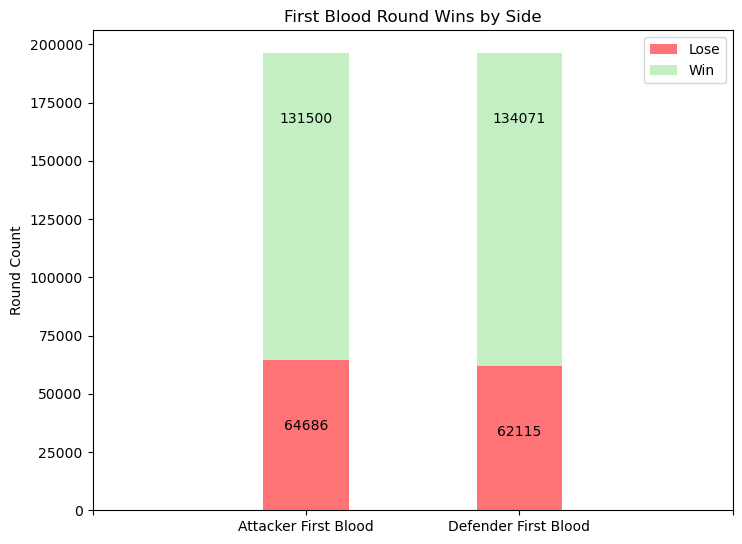

In [60]:
# convert data to pandas df (just one row each)
attackers_first_blood_pd = attackers_first_blood.toPandas()
defenders_first_blood_pd = defenders_first_blood.toPandas()

# set up indices
max_total = max(attackers_first_blood_pd.loc[0,'total'], defenders_first_blood_pd.loc[0,'total'])

# set up percentage bars
awc = attackers_first_blood_pd.loc[0,'win_count']
dwc = defenders_first_blood_pd.loc[0,'win_count']
win_counts = (awc, dwc)
lose_counts = (max_total - awc, max_total - dwc)

width = 0.40
fig = plt.figure()

# customize the plot
ax = fig.add_axes([0,0,1,1])
ax.bar([2,3], lose_counts, width, color='#FF7377')
ax.bar([2,3], win_counts, width, bottom=lose_counts, color='#C3EFC3')
ax.set_ylabel('Round Count')
ax.set_title('First Blood Round Wins by Side')
ax.set_xticks([1,2,3,4], ('', 'Attacker First Blood', 'Defender First Blood', ''))
ax.legend(labels=['Lose', 'Win'])

# add numbers to each section of each bar graph
for i, count in enumerate(lose_counts):
    ax.text(i + 2, count - 30000, str(count), ha='center', color='black')

for i, count in enumerate(win_counts):
    ax.text(i + 2, count + lose_counts[i] - 30000, str(count), ha='center', color='black')

# display the plot
plt.show()

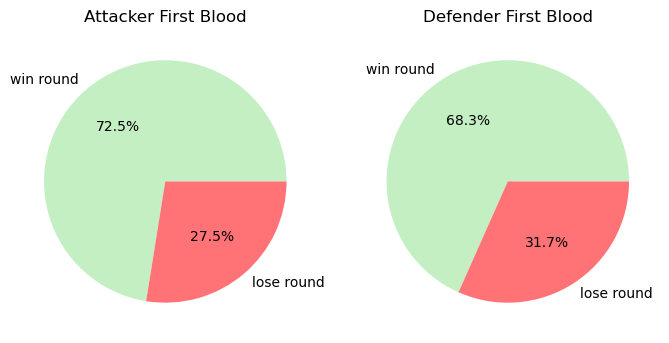

In [61]:
# create pie charts for both sides to better compare
fig, axs = plt.subplots(1, 2, figsize=(7, 5))
labels = ["win round", "lose round"]
colors = ['#C3EFC3', '#FF7377']

# pie chart for attackers
awp = attackers_first_blood_pd.loc[0,'first_blood_win_percentage']
wedges = [awp, 100 - awp]

axs[0].set_title("Attacker First Blood")
axs[0].pie(wedges, labels=labels, colors=colors, autopct='%1.1f%%')

# pie chart for defenders
dwp = defenders_first_blood_pd.loc[0,'first_blood_win_percentage']
wedges = [dwp, 100 - dwp]

axs[1].set_title("Defender First Blood")
axs[1].pie(wedges, labels=labels, colors=colors, autopct='%1.1f%%')

# display the plot
plt.tight_layout()
plt.show()

First blood is actually more important than I realized! For attackers, I hypothesized that they would have over a 50% win rate when getting the first kill, but I did not think it would be as high at 72%. Additionally, I did not think that the defender's first blood impact would be so close to the attackers! Sure, it makes sense that it's above 50%, but to be at 68% is really impressive. I thought the defenders having to defend multiple sites would make the first blood advantage not worth it (since there could still be 4v3 or 4v2 fights on a specific site making the site harder to defend anyways). But it looks like it's still beneficial for defenders to take those first fights. It also depends on if the defenders took the first fight willingly or not, that is, were the attackers already on site when this first fight took place or is the defender pushing out. I think this would make a difference in how a round would play out.

These pie charts also show that when the defenders have the first death, they only win 27.5% of the time. When the first death happens on the attacker's side they win 31.7% of the time. Which is still higher than the defenders, although not as big of a difference as I originally thought. But either way, in summary, the first duel is extremely important. In valorant, the stat websites only focus on first blood : first death ratios in the way we have defined as above, but I think when analyzing first blood impact, one should only consider a first blood as impactful if the kill is not traded out. To trade a kill means that when team A kills a player from team B, another player on team B immediately kills that player from team A, evening out the field.

I suspect that defenders who push out to get the first blood are traded easily when they get the kill (the attackers kill them right after, thus making it a 4v4), but are not avenged if they get killed because it's usually only 1 player defending one lane (maybe 2 if there's a play happening). Let's see if we can take a look at where our defenders are getting killed first or killing first, that is, is it typical for defenders to push out?

To keep this on the shorter side, let's only look at the map we found to be the most balanced: mirage.

We must infer the location of the first kill from the `dmg_table`. We will left join the location data from `dmg_table` to our `kills_table` on file, round, and tick. We also must left join the `meta_table` to get the map names (we use a subquery here so that the level of detail doesn't get messed up). We will do this twice, once for the counter terrorists winning the first fight and another for the counter terrorists losing the first fight.

In [62]:
mirage_att_pos = spark.sql(
    """SELECT
        MAX(meta_table.map) AS map,
        "ct_win_first_fight" AS event,
        kills_table.file,
        kills_table.round,
        MAX(dmg_table.att_pos_x) AS att_pos_x,
        MAX(dmg_table.att_pos_y) AS att_pos_y
    FROM
        kills_table
    LEFT JOIN
        dmg_table
            ON dmg_table.file = kills_table.file
            AND dmg_table.round = kills_table.round
            AND dmg_table.tick = kills_table.tick
    LEFT JOIN
        meta_table
            ON meta_table.file = kills_table.file
    WHERE
        kills_table.ct_alive = 5 AND kills_table.t_alive = 4
        AND kills_table.att_side = 'CounterTerrorist'
        AND meta_table.map = 'de_mirage'
    GROUP BY
        kills_table.file,
        kills_table.round
    ORDER BY
        kills_table.file,
        kills_table.round""")

mirage_vic_pos = spark.sql(
    """SELECT
        MAX(meta_table.map) AS map,
        "ct_lose_first_fight" AS event,
        kills_table.file,
        kills_table.round,
        MAX(dmg_table.vic_pos_x) AS vic_pos_x,
        MAX(dmg_table.vic_pos_y) AS vic_pos_y
    FROM
        kills_table
    LEFT JOIN
        dmg_table
            ON dmg_table.file = kills_table.file
            AND dmg_table.round = kills_table.round
            AND dmg_table.tick = kills_table.tick
    LEFT JOIN
        meta_table
            ON meta_table.file = kills_table.file
    WHERE
        kills_table.ct_alive = 4 AND kills_table.t_alive = 5
        AND kills_table.att_side = 'Terrorist'
        AND meta_table.map = 'de_mirage'
    GROUP BY
        kills_table.file,
        kills_table.round
    ORDER BY
        kills_table.file,
        kills_table.round""")

mirage_att_pos.show(5, truncate=False)
mirage_vic_pos.show(5, truncate=False)

+---------+------------------+-----------------------+-----+---------+-------------------+
|map      |event             |file                   |round|att_pos_x|att_pos_y          |
+---------+------------------+-----------------------+-----+---------+-------------------+
|de_mirage|ct_win_first_fight|esea_match_13779770.dem|1    |-1243.427|156.4024           |
|de_mirage|ct_win_first_fight|esea_match_13779770.dem|2    |36.51212 |-1745.5970000000002|
|de_mirage|ct_win_first_fight|esea_match_13779770.dem|5    |-835.5811|-92.85665          |
|de_mirage|ct_win_first_fight|esea_match_13779770.dem|7    |-924.0081|-80.15611          |
|de_mirage|ct_win_first_fight|esea_match_13779770.dem|8    |-1205.137|-610.0136          |
+---------+------------------+-----------------------+-----+---------+-------------------+
only showing top 5 rows



+---------+-------------------+-----------------------+-----+-----------------+---------+
|map      |event              |file                   |round|vic_pos_x        |vic_pos_y|
+---------+-------------------+-----------------------+-----+-----------------+---------+
|de_mirage|ct_lose_first_fight|esea_match_13779770.dem|3    |-612.1695        |-924.3959|
|de_mirage|ct_lose_first_fight|esea_match_13779770.dem|4    |-986.0506        |-545.9791|
|de_mirage|ct_lose_first_fight|esea_match_13779770.dem|6    |57.41523000000001|-1528.961|
|de_mirage|ct_lose_first_fight|esea_match_13779770.dem|9    |-1029.665        |330.5185 |
|de_mirage|ct_lose_first_fight|esea_match_13779770.dem|11   |-969.9232        |-605.7922|
+---------+-------------------+-----------------------+-----+-----------------+---------+
only showing top 5 rows



In [63]:
# print(mirage_att_pos.count())
# print(mirage_vic_pos.count())

Now that we have all the positions, let's convert the in-game coordinates to the radar map coordinates, load in the maps, and plot the locations.

In [64]:
# get bound info for mirage
mb = pandas_map_df.loc[pandas_map_df["_c0"] == "de_mirage"]

# convert positions for ct winners
mirage_att_pos_df = mirage_att_pos.toPandas()
mirage_att_pos_df["att_pos_x"] = mirage_att_pos_df["att_pos_x"].apply(lambda x: mb.iloc[0]['ResX']*(x-mb.iloc[0]['StartX']))/(mb.iloc[0]['EndX']-mb.iloc[0]['StartX'])
mirage_att_pos_df["att_pos_y"] = mirage_att_pos_df["att_pos_y"].apply(lambda x: mb.iloc[0]['ResY']*(x-mb.iloc[0]['StartY']))/(mb.iloc[0]['EndY']-mb.iloc[0]['StartY'])

# convert positions for ct victims
mirage_vic_pos_df = mirage_vic_pos.toPandas()
mirage_vic_pos_df["vic_pos_x"] = mirage_vic_pos_df["vic_pos_x"].apply(lambda x: mb.iloc[0]['ResX']*(x-mb.iloc[0]['StartX']))/(mb.iloc[0]['EndX']-mb.iloc[0]['StartX'])
mirage_vic_pos_df["vic_pos_y"] = mirage_vic_pos_df["vic_pos_y"].apply(lambda x: mb.iloc[0]['ResY']*(x-mb.iloc[0]['StartY']))/(mb.iloc[0]['EndY']-mb.iloc[0]['StartY'])

In [65]:
mirage_att_pos_df.head()

,map,event,file,round,att_pos_x,att_pos_y
0,de_mirage,ct_win_first_fight,esea_match_13779770.dem,1,394.021983,716.659464
1,de_mirage,ct_win_first_fight,esea_match_13779770.dem,2,649.560618,333.490591
2,de_mirage,ct_win_first_fight,esea_match_13779770.dem,5,475.448032,666.444775
3,de_mirage,ct_win_first_fight,esea_match_13779770.dem,7,457.793665,669.003373
4,de_mirage,ct_win_first_fight,esea_match_13779770.dem,8,401.666546,562.260491


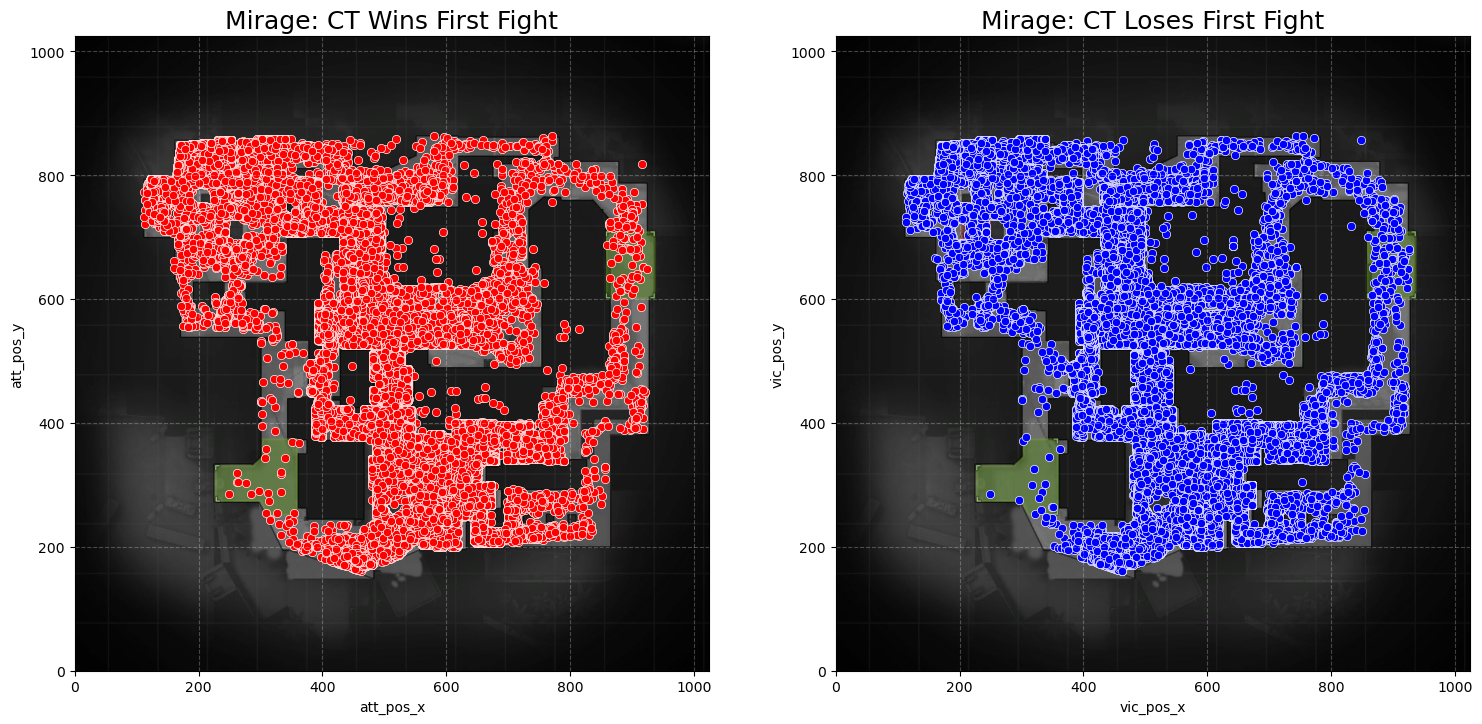

In [66]:
# read in mirage map
de_mirage = mpimg.imread('maps/de_mirage.png')
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,16))

# customize the map plots
ax1.grid(visible=True, which='major', color='w', linestyle='--', alpha=0.25)
ax2.grid(visible=True, which='major', color='w', linestyle='--', alpha=0.25)
ax1.imshow(de_mirage, zorder=0, extent=[0.0, 1024, 0.0, 1024])
ax2.imshow(de_mirage, zorder=0, extent=[0.0, 1024, 0.0, 1024])
ax1.set_title('Mirage: CT Wins First Fight', fontsize=18)
ax2.set_title('Mirage: CT Loses First Fight', fontsize=18)

# add player positions as scatter plot
sns.scatterplot(data=mirage_att_pos_df, x="att_pos_x", y="att_pos_y", color='red', ax=ax1)
sns.scatterplot(data=mirage_vic_pos_df, x="vic_pos_x", y="vic_pos_y", color='blue', ax=ax2)

# plot the maps
plt.xlim(0,1024)
plt.ylim(0,1024)
plt.show()

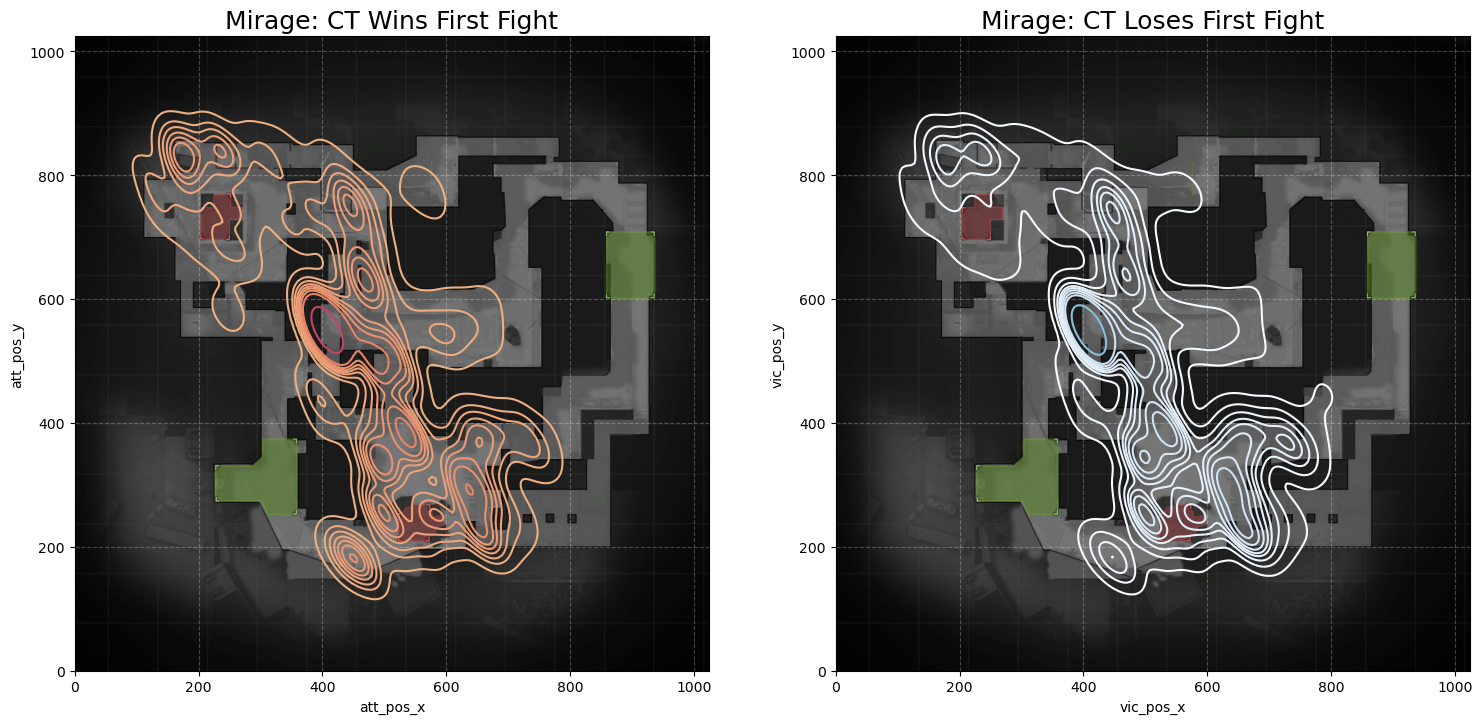

In [67]:
# read in mirage map
de_mirage = mpimg.imread('maps/de_mirage.png')
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,16))

# customize the map plots
ax1.grid(visible=True, which='major', color='w', linestyle='--', alpha=0.25)
ax2.grid(visible=True, which='major', color='w', linestyle='--', alpha=0.25)
ax1.imshow(de_mirage, zorder=0, extent=[0.0, 1024, 0.0, 1024])
ax2.imshow(de_mirage, zorder=0, extent=[0.0, 1024, 0.0, 1024])
ax1.set_title('Mirage: CT Wins First Fight', fontsize=18)
ax2.set_title('Mirage: CT Loses First Fight', fontsize=18)

# add player positions as density plot
sns.kdeplot(data=mirage_att_pos_df, x="att_pos_x", y="att_pos_y", cmap='flare', bw_method=0.15, ax=ax1)
sns.kdeplot(data=mirage_vic_pos_df, x="vic_pos_x", y="vic_pos_y", cmap='Blues', bw_method=0.15, ax=ax2)

# plot the maps
plt.xlim(0,1024)
plt.ylim(0,1024)
plt.show()

Defenders start on the left hand side of this map (they specifically spawn in the left green box) and must defend the two red boxes, while the attackers spawn in the right hand side green box. Unfortunately, this data is not very conclusive. The behavior is pretty similar in both cases. I thought maybe we would see the defenders pushing out more in the right graph (i.e. they overextend and it costs them their life more often than them winning the gun fights). But the left graph shows that they do still win these pushed out fights. So it really does seem to just be which team has the better aim (or plan). Defenders don't seem to push out too much either, you can see that the higher densities are clustered either within the sites (red boxes) or towards the middle of the map. An interesting next step would be to analyze the trade percentages of the defenders who win the first gunfight and compare the pushed out fights vs the fights closer to sites. I still suspect that the closer to site fights result in less enemy trades (i.e. the defenders don't lose their advantage). But this would be a pretty hard task to accomplish.